# F20DL Coursework

## Lab 1

The aim of this lab is to choose a dataset for the Data Mining and Machine Learning portfolio.

Three datasets were chosen from https://www.kaggle.com/. These datasets are given below.

1. Marriage and Divorce Dataset (https://www.kaggle.com/datasets/hosseinmousavi/marriage-and-divorce-dataset)
2. Violence Against Women & Girls (https://www.kaggle.com/datasets/whenamancodes/violence-against-women-girls)
3. Yu-Gi-Oh Database (https://www.kaggle.com/datasets/archanghosh/yugioh-database)

### Brief Description of the datasets

- The Marriage and Divorce Dataset has 31 attributes and all 31 contained numeric data. It did not contain any nominal data attributes. The class or target attribute of this dataset is the Divorce Probability attribute.

- The Violence Against Women & Girls dataset has 8 attributes. It consists of 4 nominal data attributes, a Record ID attribute, a Survey Year attribute and a percentage value attribute.

- The Yu-Gi-Oh Database contains images of the cards and a dataset with details from each card. There is a total of 23 attributes, with a mix of nominal and numeric data.

### Dataset Chosen

The dataset chosen from the 3 selected datasets is the Yu-Gi-Oh Database. The reasons this dataset was chosen are given below:

- The database contained image data which was seen as a benefit since image data was needed for image processing.
- The database CSV file contained nominal data which was a requirement for the chosen dataset.

The drawback of this dataset was that there was missing data from several attributes, which would require the dataset to be cleaned.

---

## Lab 2

The aims of this lab:
- Create visualizations and perform inital data exploration on the dataset to examine the data and learn more about it
- Pre-processing the data if required (removing missing values, normalization)

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### Get the Data

In [5]:
df = pd.read_csv('data/Yugi_db_cleaned.csv')
df.head()

,Image_name,Card-set,Card_number,Rarity,Card_name,Other names,Card type,Attribute,Types,Level,...,Effect types,Ritual required,Property,Ritual Monster required,Pendulum Scale,Rank,Link Arrows,ATK / LINK,Other names (Japanese),Summoned by the effect of
0,MRD-116 R.png,Metal Raiders,MRD-116,Rare,Witch of the Black Forest,NaN,Monster,DARK,Spellcaster / Effect,4.0,...,"['Trigger', 'Condition']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PHSW-EN014 C.png,Photon Shockwave,PHSW-EN014,Common,Plasma Ball,NaN,Monster,LIGHT,Thunder / Effect,3.0,...,"['Continuous', 'Trigger']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ROTD-EN030 UR.png,Rise of the Duelist,ROTD-EN030,Ultra Rare,Koa'ki Meiru Supplier,NaN,Monster,EARTH,Rock / Effect,4.0,...,"['Trigger', 'Trigger', 'Condition']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PGD-093 R.png,Pharaonic Guardian,PGD-093,Rare,Coffin Seller,NaN,Trap,NaN,NaN,NaN,...,['Trigger-like'],NaN,Continuous,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RIRA-EN060 C.png,Rising Rampage,RIRA-EN060,Common,"Elborz, the Sacred Lands of Simorgh",NaN,Spell,NaN,NaN,NaN,...,"['Continuous-like', 'Condition', 'Ignition-lik...",NaN,Field,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8373 entries, 0 to 8372
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Image_name                 8373 non-null   object 
 1   Card-set                   8373 non-null   object 
 2   Card_number                8373 non-null   object 
 3   Rarity                     8373 non-null   object 
 4   Card_name                  8373 non-null   object 
 5   Other names                159 non-null    object 
 6   Card type                  8373 non-null   object 
 7   Attribute                  5339 non-null   object 
 8   Types                      5339 non-null   object 
 9   Level                      4805 non-null   float64
 10  ATK / DEF                  5112 non-null   object 
 11  Password                   8373 non-null   object 
 12  Status                     8373 non-null   object 
 13  Effect types               7986 non-null   objec

In [4]:
df.isna().sum()

Image_name                      0
Card-set                        0
Card_number                     0
Rarity                          0
Card_name                       0
Other names                  8214
Card type                       0
Attribute                    3034
Types                        3034
Level                        3568
ATK / DEF                    3261
Password                        0
Status                          0
Effect types                  387
Ritual required              8324
Property                     5339
Ritual Monster required      8343
Pendulum Scale               8162
Rank                         8066
Link Arrows                  8146
ATK / LINK                   8146
Other names (Japanese)       8368
Summoned by the effect of    8371
dtype: int64

The attirbutes with missing values will be removed from the dataset.

In [5]:
df.drop(['Other names','Password', 'Status', 'Effect types', 'Ritual required', 'Property', 
         'Ritual Monster required', 'Pendulum Scale', 'Rank',
        'Link Arrows', 'ATK / LINK', 'Other names (Japanese)', 'Summoned by the effect of'], axis=1, inplace=True)

In [6]:
df.isna().sum()

Image_name        0
Card-set          0
Card_number       0
Rarity            0
Card_name         0
Card type         0
Attribute      3034
Types          3034
Level          3568
ATK / DEF      3261
dtype: int64

The rows with missing values are also dropped from the dataset.

In [7]:
df.dropna(axis=0, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4805 entries, 0 to 8372
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_name   4805 non-null   object 
 1   Card-set     4805 non-null   object 
 2   Card_number  4805 non-null   object 
 3   Rarity       4805 non-null   object 
 4   Card_name    4805 non-null   object 
 5   Card type    4805 non-null   object 
 6   Attribute    4805 non-null   object 
 7   Types        4805 non-null   object 
 8   Level        4805 non-null   float64
 9   ATK / DEF    4805 non-null   object 
dtypes: float64(1), object(9)
memory usage: 412.9+ KB


In [8]:
df.head()

,Image_name,Card-set,Card_number,Rarity,Card_name,Card type,Attribute,Types,Level,ATK / DEF
0,MRD-116 R.png,Metal Raiders,MRD-116,Rare,Witch of the Black Forest,Monster,DARK,Spellcaster / Effect,4.0,1100 / 1200
1,PHSW-EN014 C.png,Photon Shockwave,PHSW-EN014,Common,Plasma Ball,Monster,LIGHT,Thunder / Effect,3.0,900 / 900
2,ROTD-EN030 UR.png,Rise of the Duelist,ROTD-EN030,Ultra Rare,Koa'ki Meiru Supplier,Monster,EARTH,Rock / Effect,4.0,1400 / 1600
5,DUEA-EN098 C.png,Duelist Alliance,DUEA-EN098,Common,Cloudcastle,Monster,WIND,Machine / Synchro / Effect,9.0,0 / 3000
7,CRV-EN006 C.png,Cybernetic Revolution,CRV-EN006,Common,Patroid,Monster,EARTH,Machine / Effect,4.0,1200 / 1200


In [9]:
df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_name   4805 non-null   object 
 1   Card-set     4805 non-null   object 
 2   Card_number  4805 non-null   object 
 3   Rarity       4805 non-null   object 
 4   Card_name    4805 non-null   object 
 5   Card type    4805 non-null   object 
 6   Attribute    4805 non-null   object 
 7   Types        4805 non-null   object 
 8   Level        4805 non-null   float64
 9   ATK / DEF    4805 non-null   object 
dtypes: float64(1), object(9)
memory usage: 375.5+ KB


The 'ATK / DEF' attribute is split into two separate attributes, 'Attack' and 'Defense'

In [10]:
df[['Attack', 'Defense']] = df['ATK / DEF'].str.split('/', expand=True)

df.head()

,Image_name,Card-set,Card_number,Rarity,Card_name,Card type,Attribute,Types,Level,ATK / DEF,Attack,Defense
0,MRD-116 R.png,Metal Raiders,MRD-116,Rare,Witch of the Black Forest,Monster,DARK,Spellcaster / Effect,4.0,1100 / 1200,1100,1200
1,PHSW-EN014 C.png,Photon Shockwave,PHSW-EN014,Common,Plasma Ball,Monster,LIGHT,Thunder / Effect,3.0,900 / 900,900,900
2,ROTD-EN030 UR.png,Rise of the Duelist,ROTD-EN030,Ultra Rare,Koa'ki Meiru Supplier,Monster,EARTH,Rock / Effect,4.0,1400 / 1600,1400,1600
3,DUEA-EN098 C.png,Duelist Alliance,DUEA-EN098,Common,Cloudcastle,Monster,WIND,Machine / Synchro / Effect,9.0,0 / 3000,0,3000
4,CRV-EN006 C.png,Cybernetic Revolution,CRV-EN006,Common,Patroid,Monster,EARTH,Machine / Effect,4.0,1200 / 1200,1200,1200


In [11]:
df.drop(['ATK / DEF'], axis=1, inplace=True)

In [12]:
df.describe()

,Level
count,4805.000000
mean,4.440375
std,2.251568
min,1.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,12.000000


In [13]:
df.dtypes

Image_name      object
Card-set        object
Card_number     object
Rarity          object
Card_name       object
Card type       object
Attribute       object
Types           object
Level          float64
Attack          object
Defense         object
dtype: object

The dataset is saved into a CSV file to remove the '?' values from the 'Attack' and 'Defense' attributes.

In [14]:
# removed '?'s from Attack and Defense columns using Excel
df.to_csv('data/YuGiOh_to_clean.csv')

After cleaning the 'Attack' and 'Defense' attributes, the data is loaded again from the CSV file.

In [2]:
df = pd.read_csv('data/YuGiOh_to_clean.csv')
df.head()

,Unnamed: 0,Image_name,Card-set,Card_number,Rarity,Card_name,Card type,Attribute,Types,Level,Attack,Defense
0,0,MRD-116 R.png,Metal Raiders,MRD-116,Rare,Witch of the Black Forest,Monster,DARK,Spellcaster / Effect,4,1100,1200
1,1,PHSW-EN014 C.png,Photon Shockwave,PHSW-EN014,Common,Plasma Ball,Monster,LIGHT,Thunder / Effect,3,900,900
2,2,ROTD-EN030 UR.png,Rise of the Duelist,ROTD-EN030,Ultra Rare,Koa'ki Meiru Supplier,Monster,EARTH,Rock / Effect,4,1400,1600
3,3,DUEA-EN098 C.png,Duelist Alliance,DUEA-EN098,Common,Cloudcastle,Monster,WIND,Machine / Synchro / Effect,9,0,3000
4,4,CRV-EN006 C.png,Cybernetic Revolution,CRV-EN006,Common,Patroid,Monster,EARTH,Machine / Effect,4,1200,1200


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_name   4805 non-null   object
 1   Card-set     4805 non-null   object
 2   Card_number  4805 non-null   object
 3   Rarity       4805 non-null   object
 4   Card_name    4805 non-null   object
 5   Card type    4805 non-null   object
 6   Attribute    4805 non-null   object
 7   Types        4805 non-null   object
 8   Level        4805 non-null   int64 
 9   Attack       4805 non-null   int64 
 10  Defense      4805 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 413.1+ KB


In [5]:
df.describe()

,Level,Attack,Defense
count,4805.000000,4805.000000,4805.000000
mean,4.440375,1403.444329,1201.340271
std,2.251568,905.901217,823.080940
min,1.000000,0.000000,0.000000
25%,3.000000,700.000000,500.000000
50%,4.000000,1500.000000,1200.000000
75%,6.000000,2000.000000,1800.000000
max,12.000000,5000.000000,4500.000000


In [6]:
df['Attribute'].unique()

array(['DARK', 'LIGHT', 'EARTH', 'WIND', 'FIRE', 'WATER', 'DIVINE'],
      dtype=object)

In [7]:
df['Rarity'].unique()

array(['Rare', 'Common', 'Ultra Rare', 'Super Rare', 'Secret Rare',
       'Premium Gold Rare', 'Short Print', 'Starlight Rare', 'Ghost Rare',
       'Super Short Print'], dtype=object)

In [8]:
df.head()

,Image_name,Card-set,Card_number,Rarity,Card_name,Card type,Attribute,Types,Level,Attack,Defense
0,MRD-116 R.png,Metal Raiders,MRD-116,Rare,Witch of the Black Forest,Monster,DARK,Spellcaster / Effect,4,1100,1200
1,PHSW-EN014 C.png,Photon Shockwave,PHSW-EN014,Common,Plasma Ball,Monster,LIGHT,Thunder / Effect,3,900,900
2,ROTD-EN030 UR.png,Rise of the Duelist,ROTD-EN030,Ultra Rare,Koa'ki Meiru Supplier,Monster,EARTH,Rock / Effect,4,1400,1600
3,DUEA-EN098 C.png,Duelist Alliance,DUEA-EN098,Common,Cloudcastle,Monster,WIND,Machine / Synchro / Effect,9,0,3000
4,CRV-EN006 C.png,Cybernetic Revolution,CRV-EN006,Common,Patroid,Monster,EARTH,Machine / Effect,4,1200,1200


### Visualizations

The data is now examined through visualization to learn more about it.

Countplots are used to see the count of different instances for a categorical attribute.

<AxesSubplot:xlabel='Rarity', ylabel='count'>

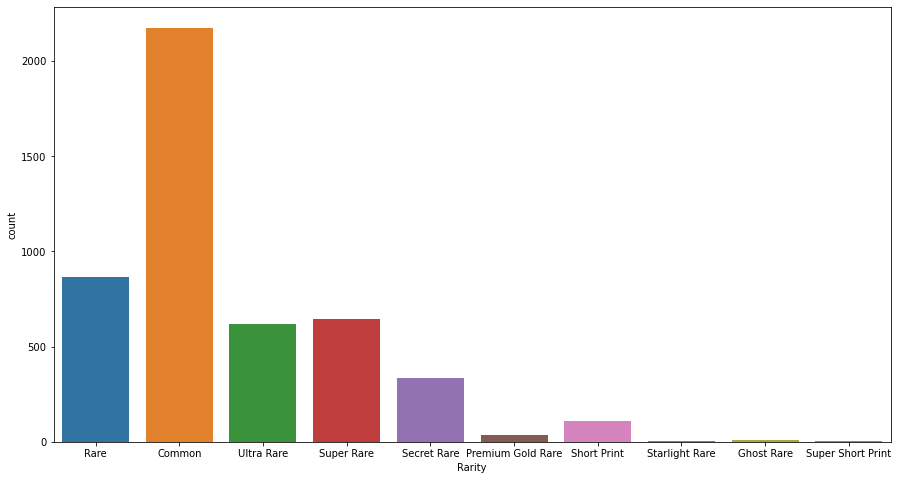

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(x='Rarity', data=df)

It is observed that there are more than 2000 instances with Rarity value 'Common'.

<AxesSubplot:xlabel='Attribute', ylabel='count'>

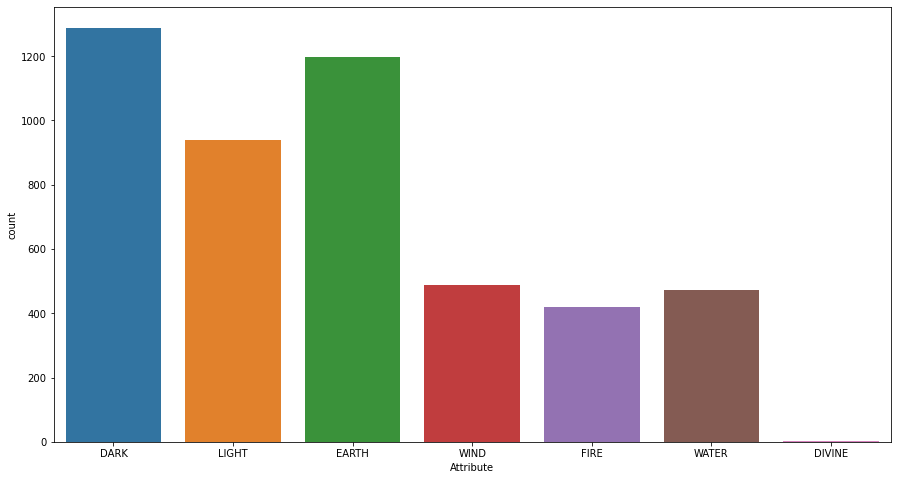

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(x='Attribute', data=df)

It is observed that there over 1200 instances with Attribute value 'Dark' and almost 1200 instances with Attribute value 'Earth'.

Jointplots can be used to analyse numeric data to see the relationship between two attributes and their individual distributions.

(-1000.0, 6000.0)

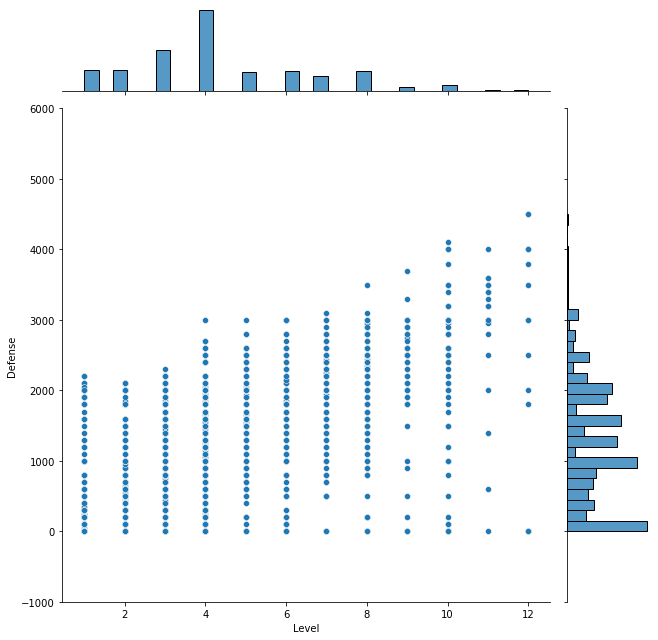

In [12]:
sns.jointplot(data=df, x='Level', y='Defense', height=9)
plt.ylim(-1000,6000)

(-1000.0, 6000.0)

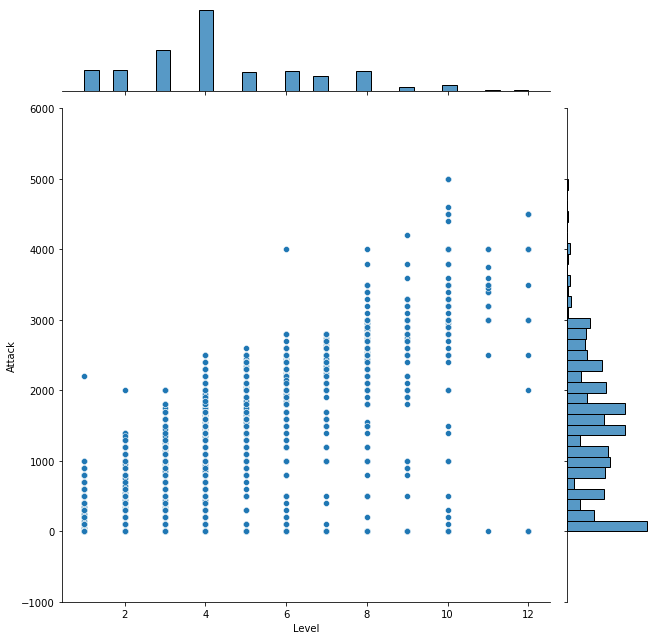

In [13]:
sns.jointplot(data=df, x='Level', y='Attack', height=9)
plt.ylim(-1000,6000)

### Lab 2 Summary

- The dataset was examined through analysis and visualizations.
- Missing values were dealt with by dropping the required attributes and instances.
- Visualizations were created to further analyse a few specifc attributes.
- The visualizations helped to see how the data was distributed for different attributes, such as the 'Rarity' and 'Attribute' attributes.
- Visualizations helped to learn the relationship of the 'Level' attribute with the 'Attack' and 'Defense' attributes respectively.

---

## Lab 3

The aims of this lab:
- Find the most correlating features to the output feature of the dataset
- Create sub-datasets with top correlating features
- Run a classifier to evaluate whether the original or smaller dataset has better accuracy 

In the previous lab, after performing data cleaning and analysis on the chosen dataset, it was found that the dataset could not be used to complete the tasks in Lab 3. 

The dataset did not have enough attributes to form smaller datasets from it, and there was no target attribute to build a classification model.

A new dataset was chosen from https://www.kaggle.com/, which is given below:

- Airline Passenger Satisfaction (https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

### Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate
%matplotlib inline

In [2]:
import sklearn
assert sklearn.__version__ >= "0.20"

### Load the two datasets

In [3]:
flight_train = pd.read_csv('data/train.csv')
flight_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
flight_test = pd.read_csv('data/test.csv')
flight_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


The two datasets are concatenated into one to perform the lab tasks. 

In [5]:
flight = pd.concat([flight_train, flight_test])

In [6]:
flight.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
# flight.to_csv('Airline_Passenger_Satisfaction.csv')

### Load data again

In [8]:
df = pd.read_csv('data/Airline_Passenger_Satisfaction.csv')

In [9]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


### Data Cleaning

In [10]:
# drop column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [12]:
# make a copy of the data to work with
df1 = df.copy()

In [13]:
# drop null value rows
df1.dropna(axis=0, inplace=True)

In [14]:
# change the data type to float
df1['Departure Delay in Minutes'] = df1['Departure Delay in Minutes'].astype('float')

In [15]:
# get the rows with 0 rating (rating not indicated)
zeroRatingIndex = df1[(df1['Inflight wifi service']==0)|
                     (df1['Departure/Arrival time convenient']==0)|
                     (df1['Ease of Online booking']==0)|
                     (df1['Gate location']==0)|
                     (df1['Food and drink']==0)|
                     (df1['Online boarding']==0)|
                     (df1['Seat comfort']==0)|
                     (df1['Inflight entertainment']==0)|
                     (df1['On-board service']==0)|
                     (df1['Leg room service']==0)|
                     (df1['Baggage handling']==0)|
                     (df1['Checkin service']==0)|
                     (df1['Inflight service']==0)|
                     (df1['Cleanliness']==0)].index

In [16]:
df1.drop(zeroRatingIndex, inplace=True)

In [17]:
# print the unique values for the columns
for c in df1:
    if (df1[c].dtype == 'object') | (df1[c].dtype == 'int64'):
        print(c, ":", df1[c].unique())

id : [ 70172   5047 110028 ...  37675  90086  34799]
Gender : ['Male' 'Female']
Customer Type : ['Loyal Customer' 'disloyal Customer']
Age : [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 57 49 36 22 31 15
 35 67 37 40 34 39 50 29 54 21 28 27 69 60 23 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 18 55 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Type of Travel : ['Personal Travel' 'Business travel']
Class : ['Eco Plus' 'Business' 'Eco']
Flight Distance : [ 460  235 1142 ... 1003 1441  884]
Inflight wifi service : [3 2 4 1 5]
Departure/Arrival time convenient : [4 2 5 3 1]
Ease of Online booking : [3 2 5 4 1]
Gate location : [1 3 2 5 4]
Food and drink : [5 1 2 4 3]
Online boarding : [3 5 2 1 4]
Seat comfort : [5 1 2 3 4]
Inflight entertainment : [5 1 2 3 4]
On-board service : [4 1 2 3 5]
Leg room service : [3 5 4 2 1]
Baggage handling : [4 3 5 1 2]
Checkin service : [4 1 3 5 2]
Inflight service : [5 4 3 1 2]
Cleanliness : [5 1 2 3 4]
satisfaction : ['neutral or di

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119204 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 119204 non-null  int64  
 1   Gender                             119204 non-null  object 
 2   Customer Type                      119204 non-null  object 
 3   Age                                119204 non-null  int64  
 4   Type of Travel                     119204 non-null  object 
 5   Class                              119204 non-null  object 
 6   Flight Distance                    119204 non-null  int64  
 7   Inflight wifi service              119204 non-null  int64  
 8   Departure/Arrival time convenient  119204 non-null  int64  
 9   Ease of Online booking             119204 non-null  int64  
 10  Gate location                      119204 non-null  int64  
 11  Food and drink                     1192

In [19]:
df1.reset_index(inplace=True)
df1.drop('index', axis=1, inplace=True)
df1.drop('id', axis=1, inplace=True)

In [20]:
# df1.to_csv("Airline_Passenger_Satisfaction_Cleaned.csv")

In [21]:
df1

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119199,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0.0,0.0,neutral or dissatisfied
119200,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0.0,0.0,satisfied
119201,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0.0,0.0,neutral or dissatisfied
119202,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0.0,0.0,satisfied


In [22]:
# basic statistical summary of the data
df1.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000
mean,39.858092,1223.791920,2.817749,3.206679,2.879031,2.987047,3.213785,3.330576,3.456562,3.380507,3.386354,3.380608,3.637109,3.294688,3.646547,3.294034,14.837631,15.284361
std,15.028936,999.840822,1.253348,1.386885,1.298665,1.282043,1.324443,1.263094,1.311612,1.327262,1.285393,1.295451,1.167923,1.266235,1.165733,1.310339,38.165770,38.687386
min,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,28.000000,440.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,867.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1775.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Visualizations

The attributes of the data are analysed through visualizations.

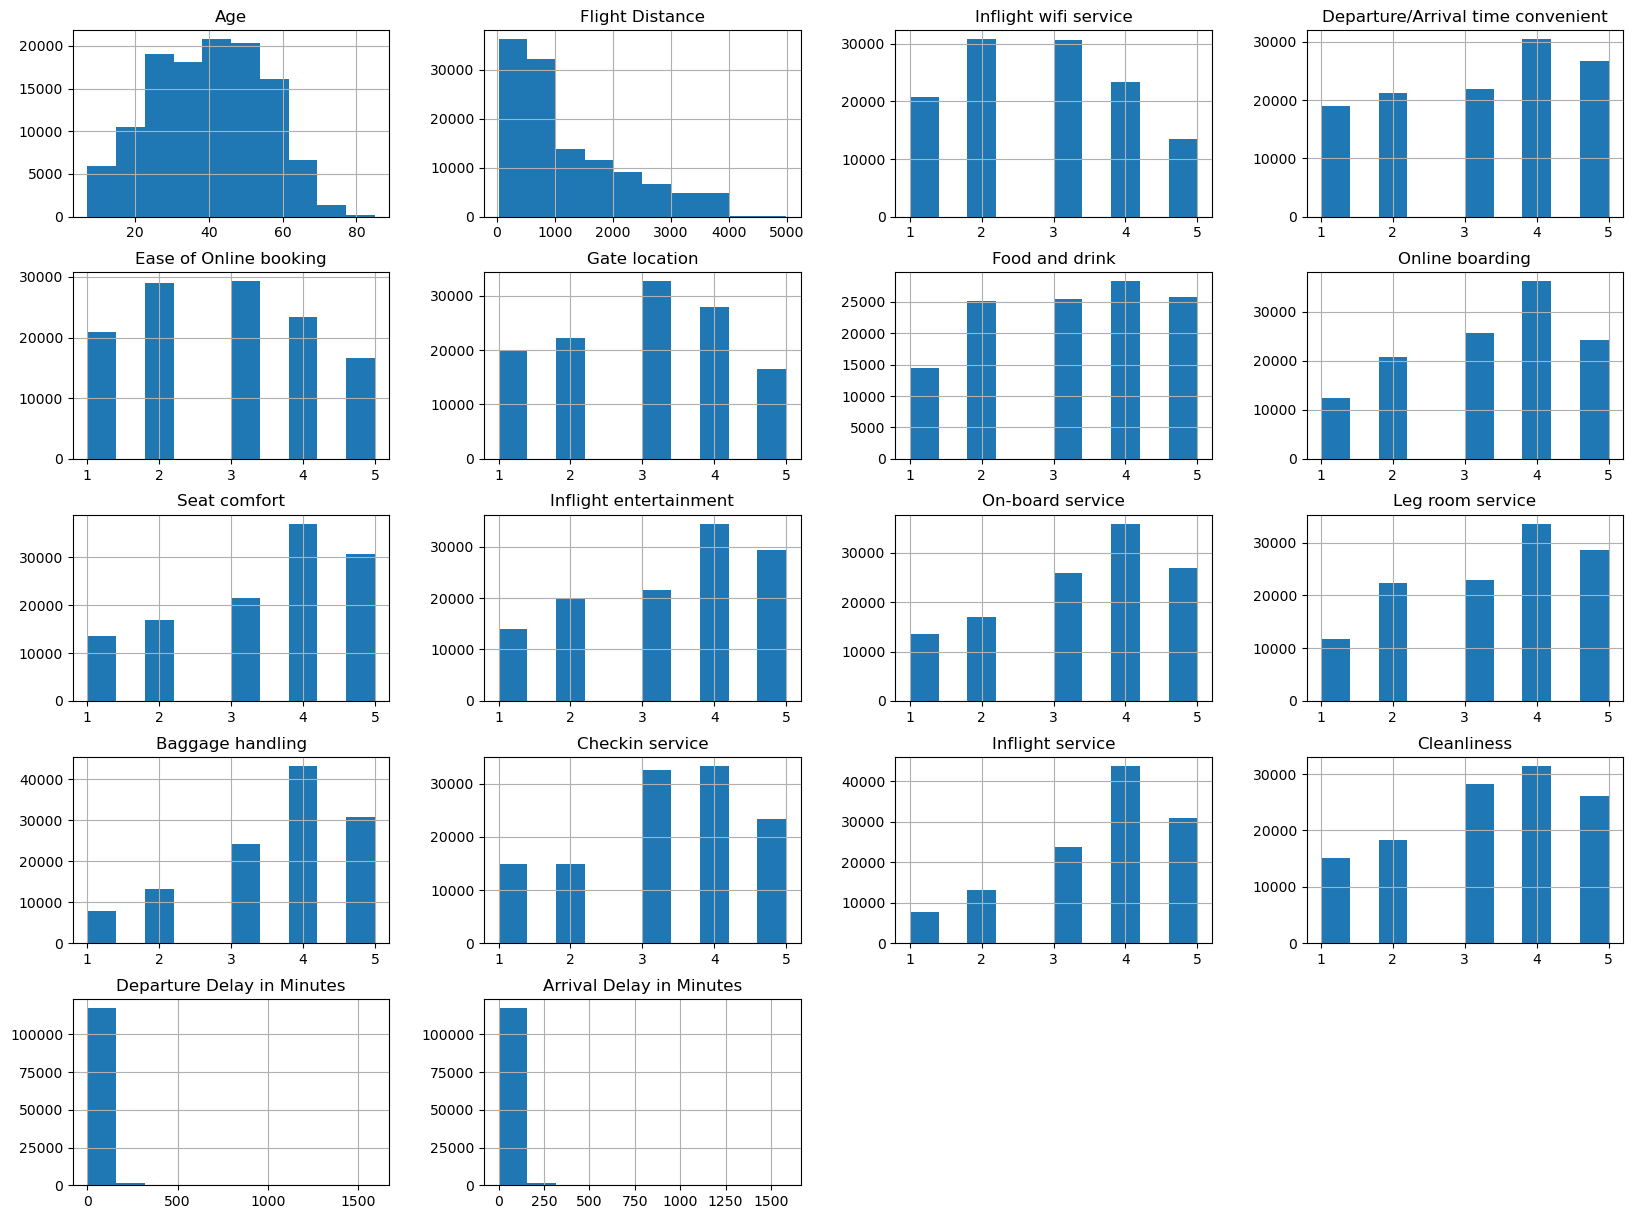

In [23]:
df1.hist(bins=10, figsize=(20,15))
plt.show()

The above shows the distribution of data for each feature in the data.

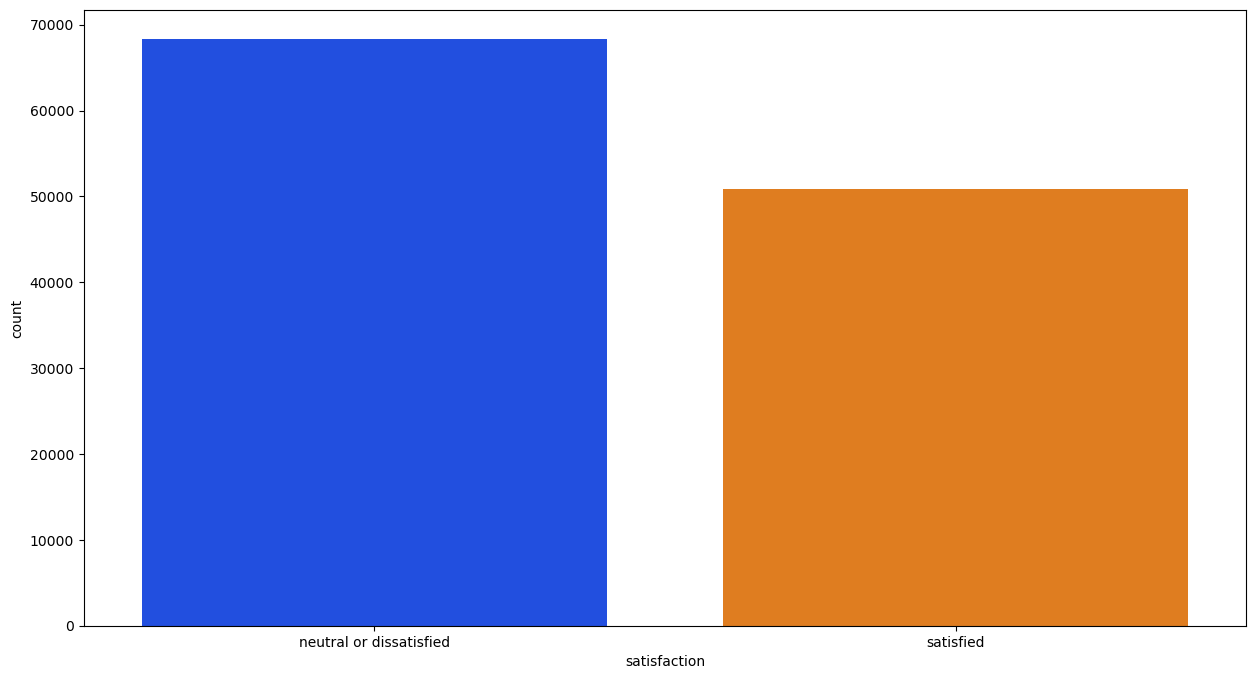

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(data=df1,x='satisfaction', palette='bright')
plt.show()

The above graph shows that there are more instances labelled 'neutral or dissatisfied' than 'satisfied'.

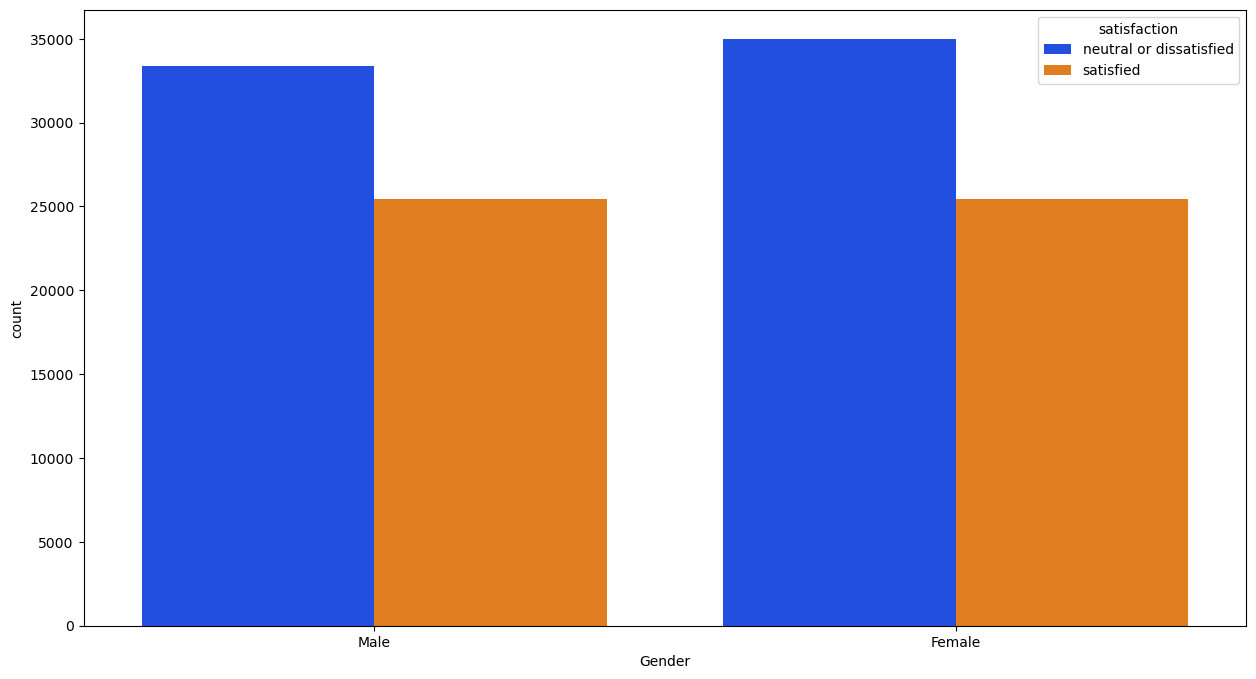

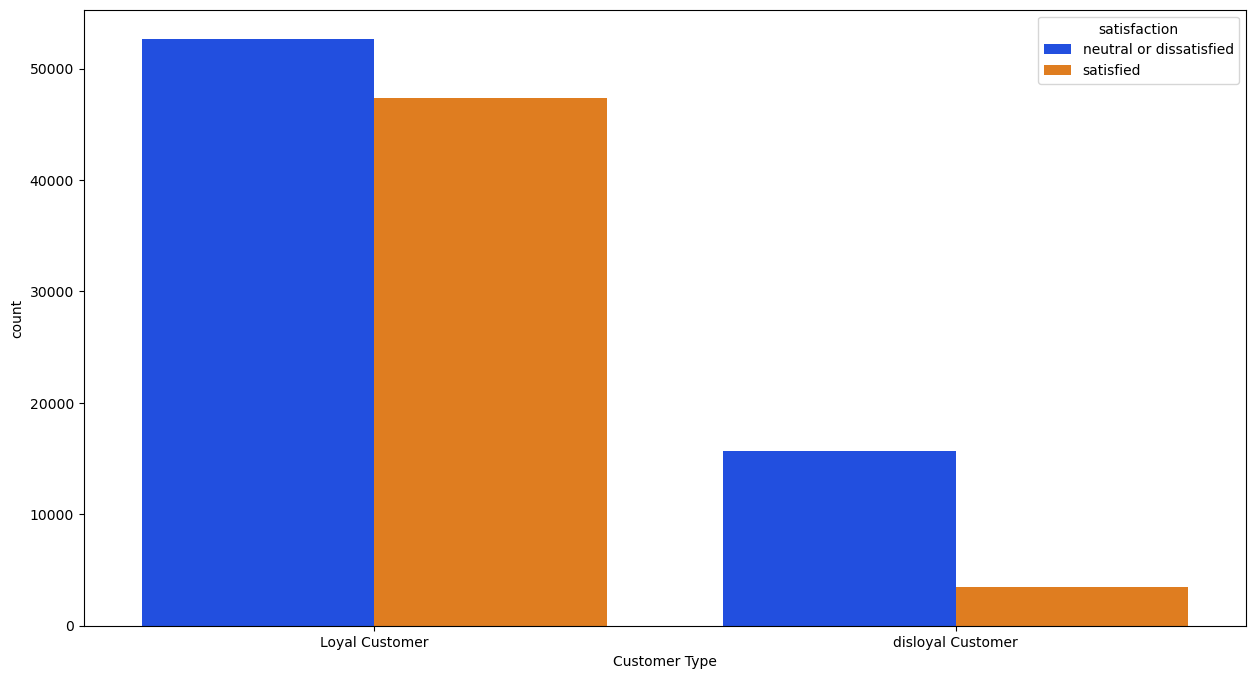

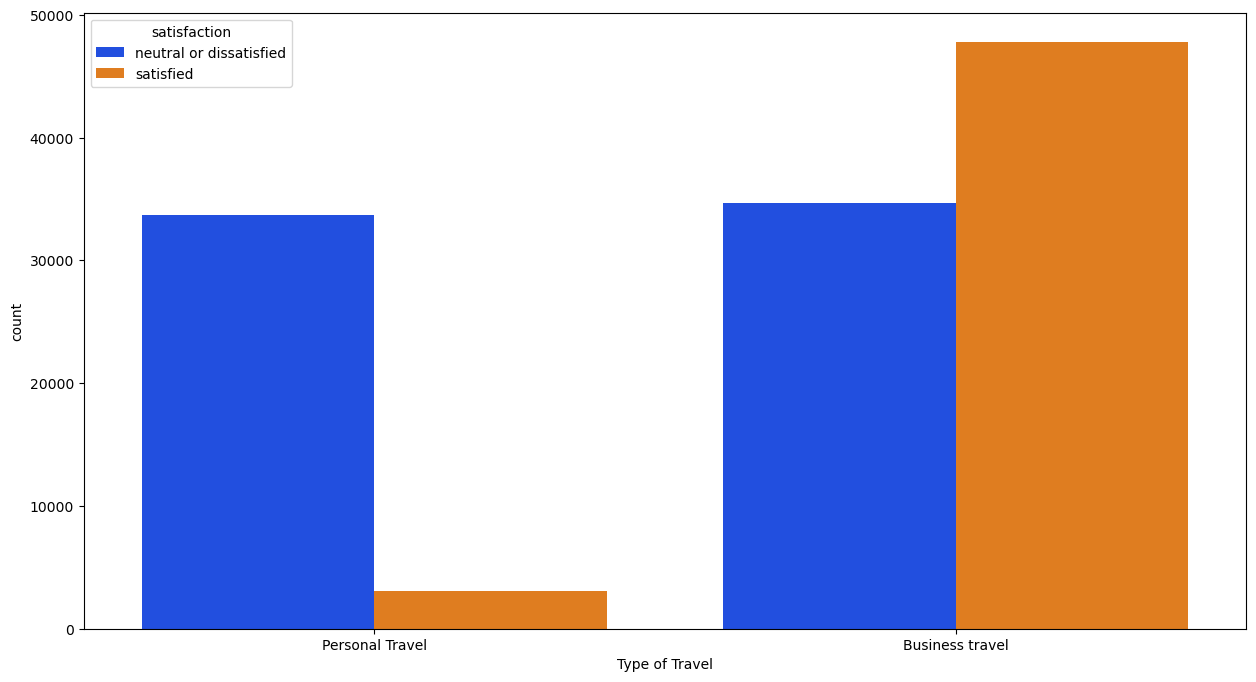

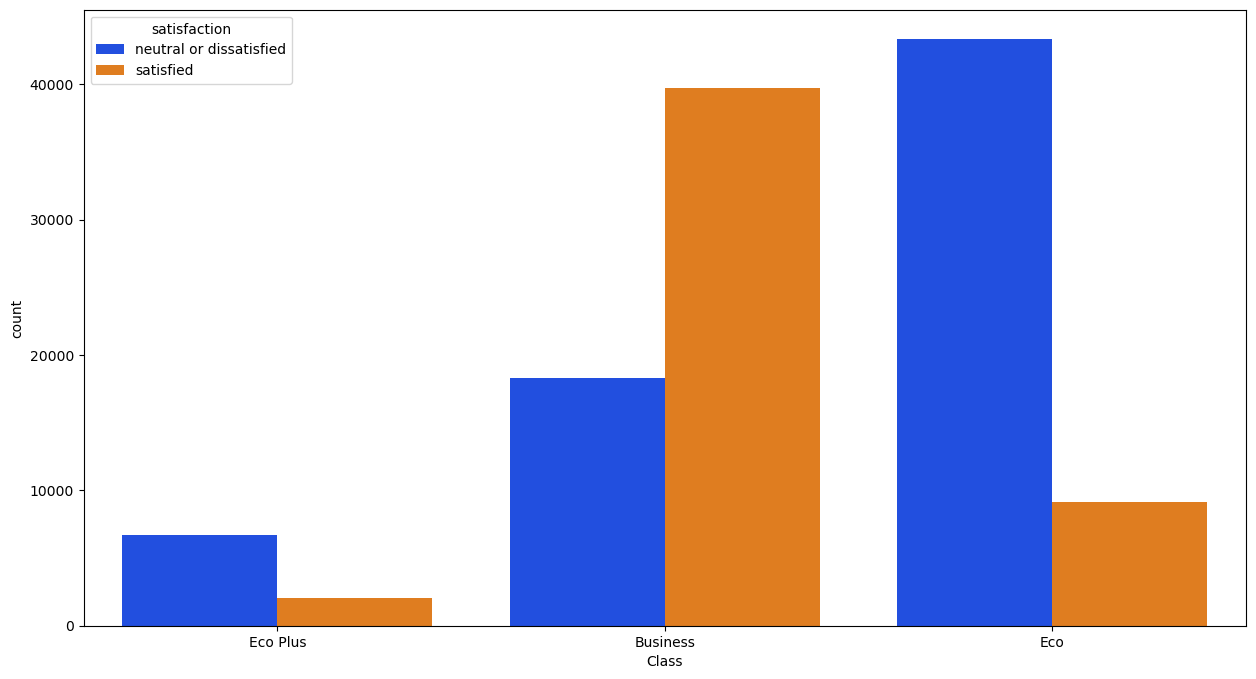

In [24]:
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for i in cat_cols:
    plt.figure(figsize=(15,8))
    sns.countplot(data=df1, x=i, hue='satisfaction', palette='bright')
    plt.show()

Observations from above plots:
- number of male and female passengers that were satisfied/unsatisfied are almost the same
- majority of passengers are loyal customers (returning customers)
- majority of satisfied passengers traveled for business purpose
- majority of satisfied passengers traveled in business class
- majority of unsatisfied customers traveled in economy class

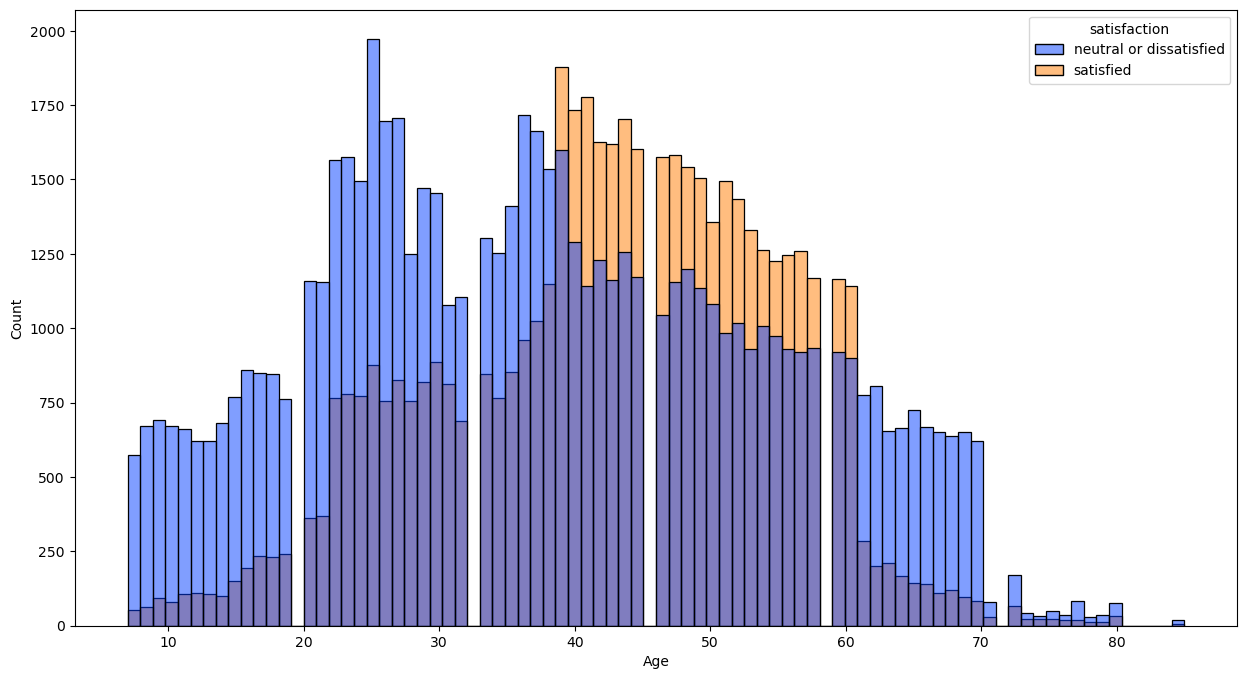

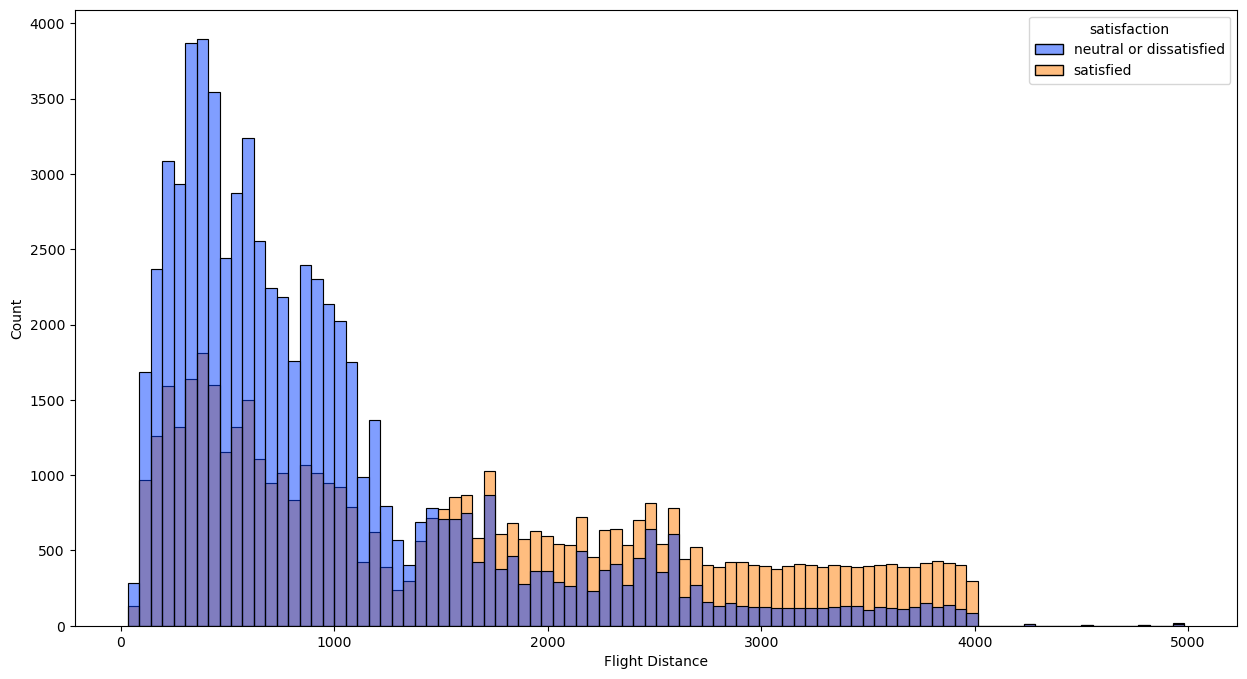

In [26]:
num_cols = ['Age', 'Flight Distance']
for i in num_cols:
    plt.figure(figsize=(15,8))
    sns.histplot(data=df1, x=i, hue='satisfaction', palette='bright')
    plt.show()

The data is encoded with LabelEncoder to find the most correlating attributes with the target attribute.

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df3 = df1.copy()
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for c in cat_cols:
    df3[c] = label_encoder.fit_transform(df3[c])

df3['satisfaction'] = df3['satisfaction'].replace('satisfied', 1)
df3['satisfaction'] = df3['satisfaction'].replace('neutral or dissatisfied', 0)

df3

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11.0,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119199,1,1,34,0,0,526,3,3,3,1,...,4,3,2,4,4,5,4,0.0,0.0,0
119200,1,0,23,0,0,646,4,4,4,4,...,4,4,5,5,5,5,4,0.0,0.0,1
119201,0,0,17,1,1,828,2,5,1,5,...,2,4,3,4,5,4,2,0.0,0.0,0
119202,1,0,14,0,0,1127,3,3,3,3,...,4,3,2,5,4,5,4,0.0,0.0,1


In [27]:
# correlation of features
corr_matrix = df3.corr()
corr_matrix['satisfaction'].sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.569836
Inflight entertainment               0.438072
Seat comfort                         0.374360
Inflight wifi service                0.373656
On-board service                     0.348820
Leg room service                     0.344192
Cleanliness                          0.330021
Flight Distance                      0.307337
Baggage handling                     0.273304
Inflight service                     0.268287
Checkin service                      0.245044
Ease of Online booking               0.227903
Food and drink                       0.227690
Age                                  0.152868
Gender                               0.011853
Gate location                        0.001269
Departure Delay in Minutes          -0.051152
Arrival Delay in Minutes            -0.058318
Departure/Arrival time convenient   -0.058489
Customer Type                       -0.216518
Class                             

The correlation matrix is plotted below.

C:\Users\jishn\AppData\Local\Temp\ipykernel_8204\3326374630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr().round(2)


<Axes: >

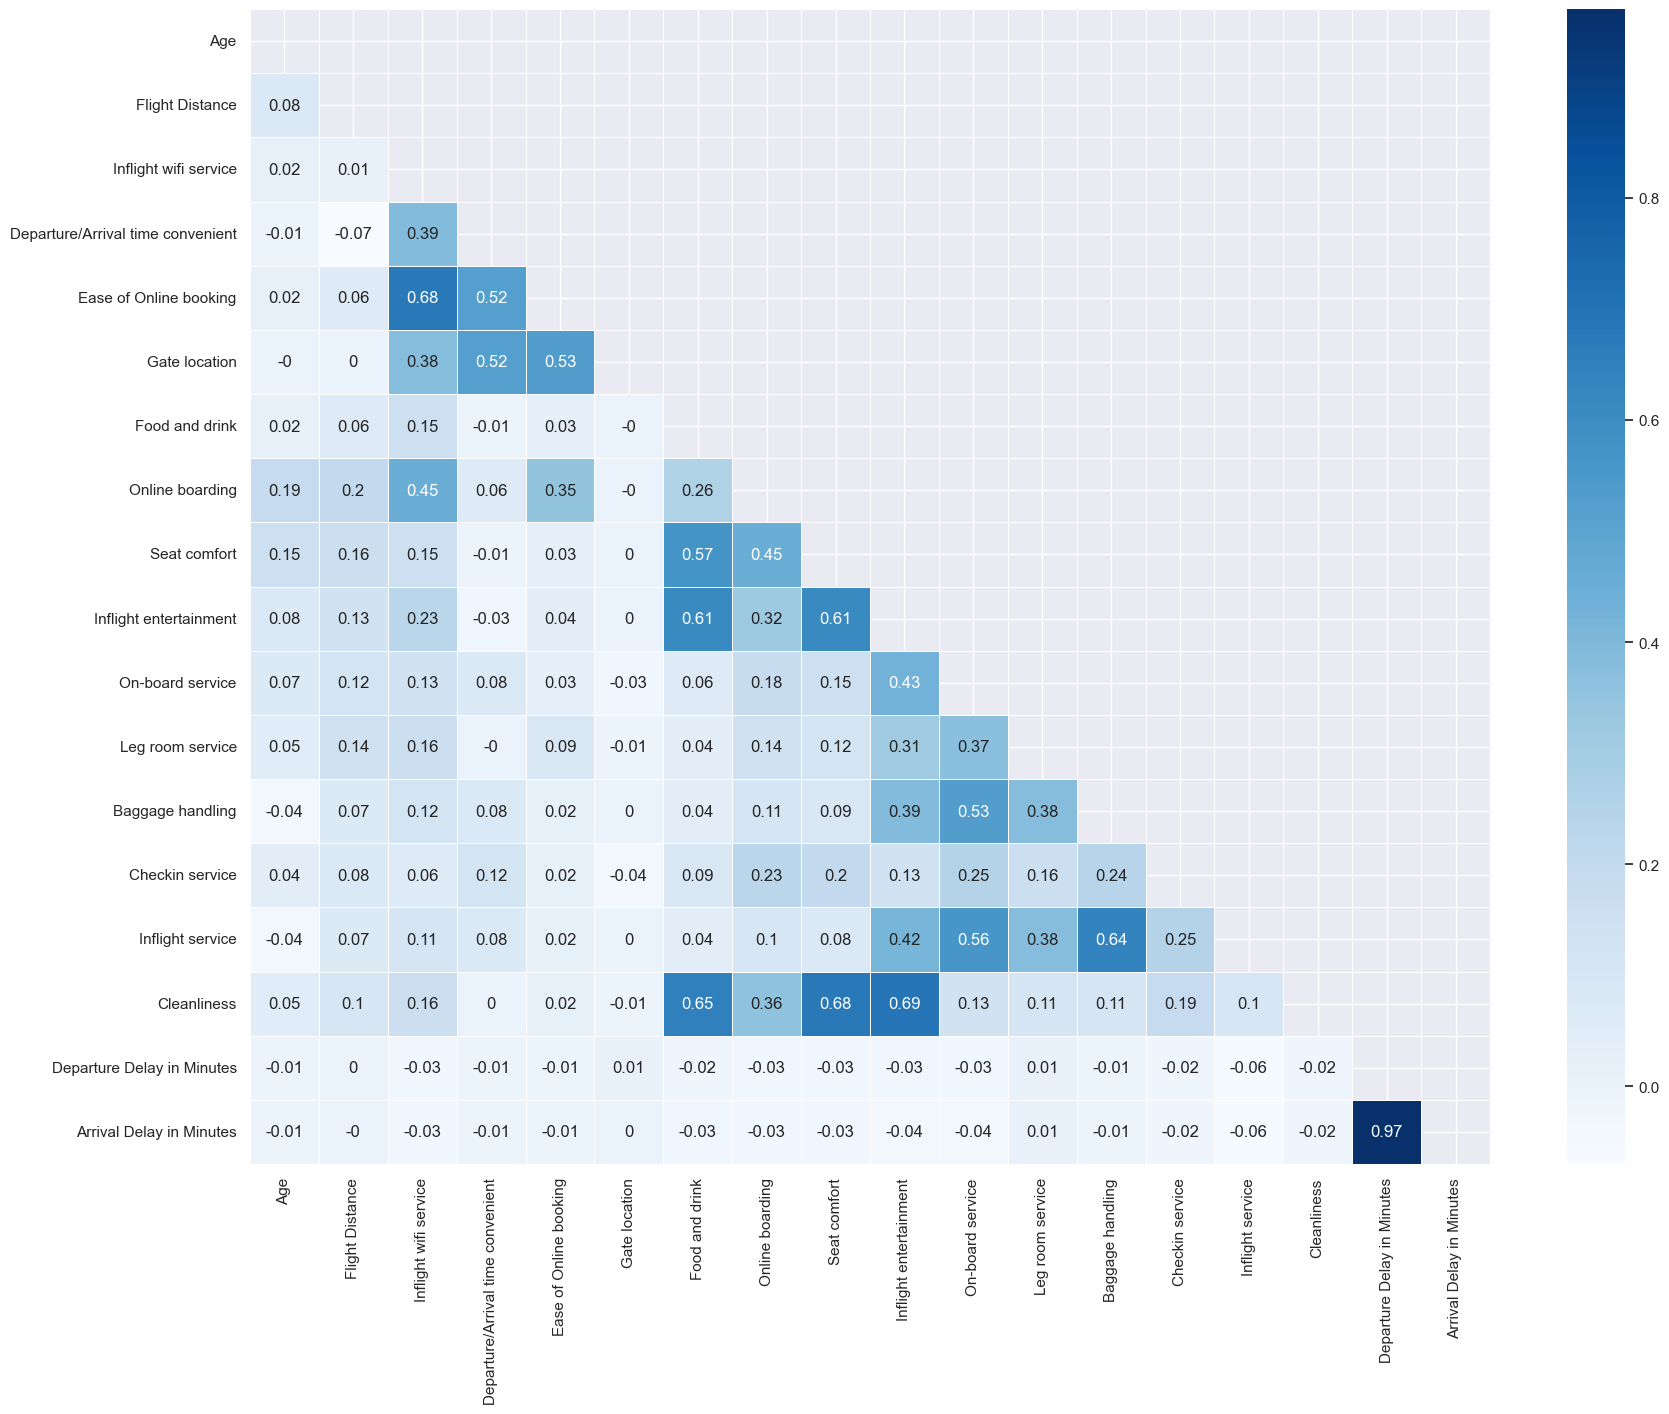

In [27]:
corr_matrix = df1.corr().round(2)

heat_mask = np.zeros_like(corr_matrix, dtype=bool)
heat_mask[np.triu_indices_from(heat_mask)] = True

sns.set(font_scale=1)
plt.figure(figsize = (20,15))
sns.heatmap(corr_matrix, annot = True, cmap='Blues', linewidths=0.5, mask=heat_mask)

3 datasets are formed with the top 2, 4, and 6 attributes that correlate per class of the target attribute.

In [29]:
df_top2 = df1[['Online boarding', 'Inflight entertainment', 'Type of Travel', 'Class']]
df_top4 = df1[['Online boarding', 'Inflight entertainment', 'Seat comfort', 'Inflight wifi service',
               'Type of Travel', 'Class', 'Customer Type', 'Departure/Arrival time convenient']]
df_top6 = df1[['Online boarding', 'Inflight entertainment', 'Seat comfort', 'Inflight wifi service', 
               'On-board service', 'Leg room service', 'Type of Travel', 'Class', 'Customer Type', 
               'Departure/Arrival time convenient', 'Arrival Delay in Minutes', 'Departure Delay in Minutes']]

In [30]:
# df_top2.to_csv('Airline_Passenger_Satisfaction_Top2.csv')
# df_top4.to_csv('Airline_Passenger_Satisfaction_Top4.csv')
# df_top6.to_csv('Airline_Passenger_Satisfaction_Top6.csv')

In [31]:
df4 = df1.copy()

df4['satisfaction'] = df4['satisfaction'].replace('satisfied', 1)
df4['satisfaction'] = df4['satisfaction'].replace('neutral or dissatisfied', 0)

In [32]:
df4

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11.0,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119199,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0.0,0.0,0
119200,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0.0,0.0,1
119201,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0.0,0.0,0
119202,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0.0,0.0,1


In [33]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119204 entries, 0 to 119203
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             119204 non-null  object 
 1   Customer Type                      119204 non-null  object 
 2   Age                                119204 non-null  int64  
 3   Type of Travel                     119204 non-null  object 
 4   Class                              119204 non-null  object 
 5   Flight Distance                    119204 non-null  int64  
 6   Inflight wifi service              119204 non-null  int64  
 7   Departure/Arrival time convenient  119204 non-null  int64  
 8   Ease of Online booking             119204 non-null  int64  
 9   Gate location                      119204 non-null  int64  
 10  Food and drink                     119204 non-null  int64  
 11  Online boarding                    1192

In [34]:
cat_one_hot = ['Gender', 'Customer Type', 'Type of Travel']
cat_ordinal = ['Class']
num_standard = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
num_min_max = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
               'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
               'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

A LogisticRegression classifier is run on the original and smaller datasets.
Cross validation is performed and the accuracies are recorded.

In [35]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score 

In [36]:
df_accuracies = pd.DataFrame({'Number of Features':[], 'Cross Val Score Mean':[]})

In [37]:
log_reg = LogisticRegression(solver='liblinear', random_state=0)

X = df4.iloc[:, :-1]
y = df4.iloc[:, -1]

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X[num_standard] = std_scaler.fit_transform(X[num_standard])
X[num_min_max] = min_max_scaler.fit_transform(X[num_min_max])
X[cat_ordinal] = oe.fit_transform(X[cat_ordinal])
X = onehot.fit_transform(X)

cv = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy').mean()

print('All features:')
print(cv)
df_accuracies.loc[len(df_accuracies.index)] = ['All features', cv]

All features:
0.8981242515745436


In [38]:
log_reg = LogisticRegression(solver='liblinear', random_state=0)

X = df_top2.copy()
y = df4.iloc[:, -1]

onehot_1 = ColumnTransformer([('onehot', OneHotEncoder(), ['Type of Travel'])], remainder='passthrough')
min_max_scaler_1 = MinMaxScaler()
oe_1 = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']], dtype=np.str_)

min_max_cols = ['Online boarding', 'Inflight entertainment']

X[min_max_cols] = min_max_scaler_1.fit_transform(X[min_max_cols])
X[cat_ordinal] = oe_1.fit_transform(X[cat_ordinal])
X = onehot_1.fit_transform(X)

cv = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy').mean()

print('Top 2 features:')
print(cv)
df_accuracies.loc[len(df_accuracies.index)] = ['Top 2 Features', cv]

Top 2 features:
0.8673870007752379


In [39]:
log_reg = LogisticRegression(solver='liblinear', random_state=0)

X = df_top4.copy()
y = df4.iloc[:, -1]

onehot_2 = ColumnTransformer([('onehot', OneHotEncoder(), ['Type of Travel', 'Customer Type'])], remainder='passthrough')
min_max_scaler_2 = MinMaxScaler()
oe_2 = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']], dtype=np.str_)

min_max_cols = ['Online boarding', 'Inflight entertainment', 
                'Seat comfort', 'Inflight wifi service', 'Departure/Arrival time convenient']

X[min_max_cols] = min_max_scaler_2.fit_transform(X[min_max_cols])
X[cat_ordinal] = oe_2.fit_transform(X[cat_ordinal])
X = onehot_2.fit_transform(X)

cv = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy').mean()

print('Top 4 features:')
print(cv)
df_accuracies.loc[len(df_accuracies.index)] = ['Top 4 Features', cv]

Top 4 features:
0.8805996460760408


In [40]:
log_reg = LogisticRegression(solver='liblinear', random_state=0)

X = df_top6.copy()
y = df4.iloc[:, -1]

onehot_3 = ColumnTransformer([('onehot', OneHotEncoder(), ['Type of Travel', 'Customer Type'])], remainder='passthrough')
min_max_scaler_3 = MinMaxScaler()
oe_3 = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']], dtype=np.str_)
std_scaler_3 = StandardScaler()

min_max_cols = ['Online boarding', 'Inflight entertainment', 
                'Seat comfort', 'Inflight wifi service', 'Departure/Arrival time convenient',
               'On-board service', 'Leg room service']

std_cols = ['Arrival Delay in Minutes', 'Departure Delay in Minutes']

X[min_max_cols] = min_max_scaler_3.fit_transform(X[min_max_cols])
X[std_cols] = std_scaler_3.fit_transform(X[std_cols])
X[cat_ordinal] = oe_3.fit_transform(X[cat_ordinal])
X = onehot_3.fit_transform(X)

cv = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy').mean()

print('Top 6 features:')
print(cv)
df_accuracies.loc[len(df_accuracies.index)] = ['Top 6 Features', cv]

Top 6 features:
0.8916563362606962


In [41]:
print(tabulate(df_accuracies, headers='keys', tablefmt='psql'))

+----+----------------------+------------------------+
|    | Number of Features   |   Cross Val Score Mean |
|----+----------------------+------------------------|
|  0 | All features         |               0.898124 |
|  1 | Top 2 Features       |               0.867387 |
|  2 | Top 4 Features       |               0.8806   |
|  3 | Top 6 Features       |               0.891656 |
+----+----------------------+------------------------+


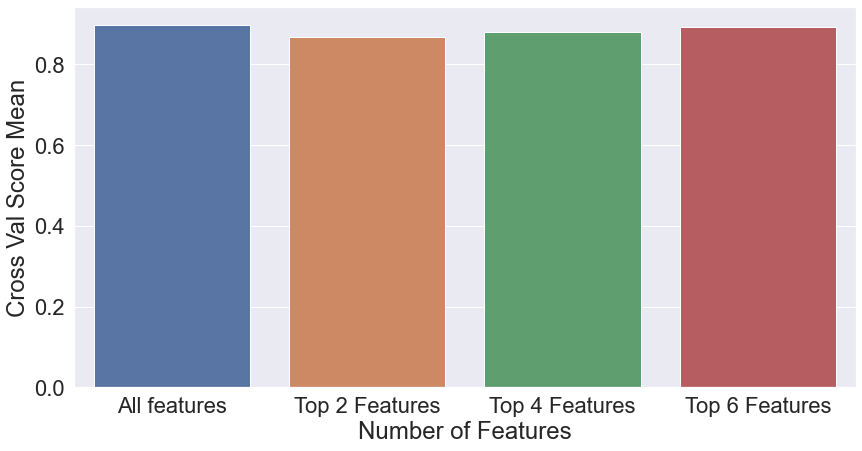

In [42]:
plt.figure(figsize=(14,7))
sns.barplot(data=df_accuracies, x='Number of Features', y='Cross Val Score Mean')
plt.show()

From the accuracies, we can see that using all the features for training the model brought the best results.

 
---

## Lab 4

The objectives of this lab:
- Run a classifier model and record evaluation metrics (accuracy, precision, recall etc)
- Plot the confusion matrix and make comparisons
- Build a pipeline model for the classifier
 

In [22]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate
%matplotlib inline

import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score 

In [66]:
# import data
df = pd.read_csv("data/Airline_Passenger_Satisfaction_Cleaned.csv")

df['satisfaction'] = df['satisfaction'].replace('satisfied', 1)
df['satisfaction'] = df['satisfaction'].replace('neutral or dissatisfied', 0)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [67]:
cat_one_hot = ['Gender', 'Customer Type', 'Type of Travel']
cat_ordinal = ['Class']
num_standard = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
num_min_max = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
               'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
               'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [68]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[num_standard] = std_scaler.fit_transform(X_train[num_standard])
X_train[num_min_max] = min_max_scaler.fit_transform(X_train[num_min_max])
X_train[cat_ordinal] = oe.fit_transform(X_train[cat_ordinal])
X_train = onehot.fit_transform(X_train)

X_test[num_standard] = std_scaler.transform(X_test[num_standard])
X_test[num_min_max] = min_max_scaler.transform(X_test[num_min_max])
X_test[cat_ordinal] = oe.transform(X_test[cat_ordinal])
X_test = onehot.transform(X_test)

In [12]:
def model_eval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tp_rate = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    fp_rate = cm[1, 0] / (cm[1, 0] + cm[1, 1])
    acc = accuracy_score(y_test, y_pred)
    presc = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred) 
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    print("TP Rate: ", tp_rate)
    print("FP Rate: ", fp_rate)
    print("Accuracy Score: ", acc)
    print("Precision Score: ", presc)
    print("Recall Score: ", rec)
    print("F1 Score: ", f1)
    print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))
    sns.set(font_scale=1)
    sns.heatmap(cm, annot=True, cmap='PuBu', fmt='g')
    scores_dict = {'Model': type(model).__name__, 'TP Rate': tp_rate, 'FP Rate': fp_rate, 'Accuracy': acc, 
                   'Precision': presc, 'Recall': rec, 'F1': f1, 'ROC AUC': roc}
    return scores_dict

In [30]:
from sklearn.neighbors import KNeighborsClassifier

TP Rate:  0.9563694732234058
FP Rate:  0.1128761716822891
Accuracy Score:  0.9269325951092655
Precision Score:  0.9376368755866097
Recall Score:  0.8871238283177109
F1 Score:  0.9116812005678362
ROC AUC Score:  0.9217466507705583


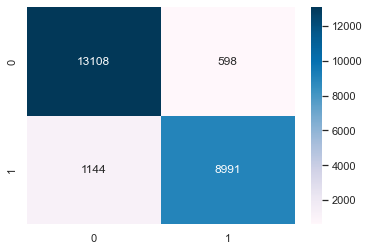

In [70]:
knn_clf = KNeighborsClassifier()

knn_dict = model_eval(knn_clf, X_train, X_test, y_train, y_test)

### ROC Curve

In [32]:
from sklearn.metrics import roc_curve

In [71]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [72]:
knn_probs = knn.predict_proba(X_test)

In [73]:
knn_probs_positive = knn_probs[:, 1]

In [74]:
roc_auc_score(y_test, knn_probs_positive)

0.9679688606266879

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, knn_probs_positive)

In [76]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

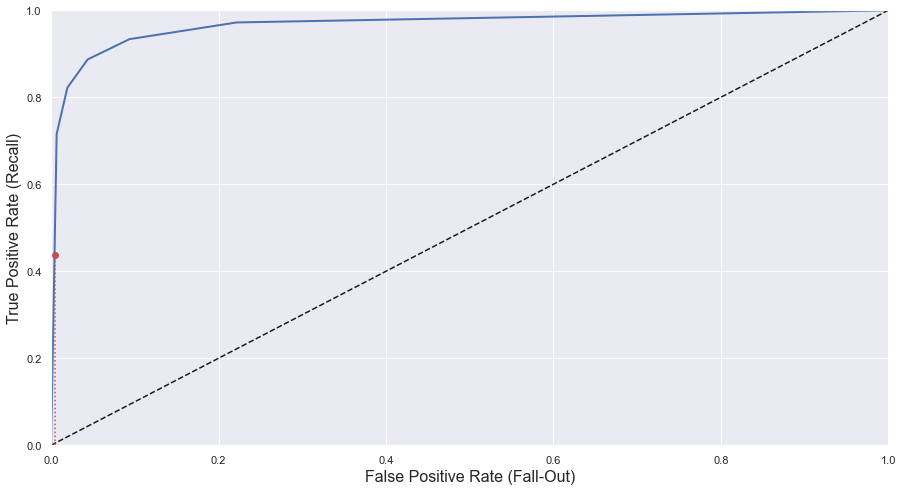

In [77]:
plt.figure(figsize=(15, 8))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:") 
plt.plot([4.837e-3], [0.4368], "ro")              
plt.show()

In [79]:
knn = KNeighborsClassifier()

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X[num_standard] = std_scaler.fit_transform(X[num_standard])
X[num_min_max] = min_max_scaler.fit_transform(X[num_min_max])
X[cat_ordinal] = oe.fit_transform(X[cat_ordinal])
X = onehot.fit_transform(X)
 
print('Cross Val Score')
print("Scoring - Accuracy: ", cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

Cross Val Score
Scoring - Accuracy:  0.9279051356835183


In [80]:
for k, v in knn_dict.items():
    print(k, ": ", v)

Model :  KNeighborsClassifier
TP Rate :  0.9563694732234058
FP Rate :  0.1128761716822891
Accuracy :  0.9269325951092655
Precision :  0.9376368755866097
Recall :  0.8871238283177109
F1 :  0.9116812005678362
ROC AUC :  0.9217466507705583


In [81]:
from sklearn.pipeline import Pipeline

In [82]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [83]:
ct = ColumnTransformer([
    ('standard', StandardScaler(), num_standard),
    ('minmax', MinMaxScaler(), num_min_max),
    ('onehot', OneHotEncoder(), cat_one_hot),
    ('ordinal', OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']]), cat_ordinal),], 
    remainder='passthrough')

In [84]:
pipe = Pipeline([('c_transformer', ct), ('knn', KNeighborsClassifier())])

In [85]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('c_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
         

In [86]:
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
presc = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
print("Accuracy Score: ", acc)
print("Precision Score: ", presc)
print("Recall Score: ", rec)
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Accuracy Score:  0.9269325951092655
Precision Score:  0.9376368755866097
Recall Score:  0.8871238283177109
F1 Score:  0.9116812005678362
ROC AUC Score:  0.9217466507705583


 
---

## Lab 5

The objectives of this lab:
- Redo the steps from the previous lab with the Naive Bayes classifier
- Compare the different Naive Bayes classifiers

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate
%matplotlib inline

import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score 

In [8]:
df = pd.read_csv("data/Airline_Passenger_Satisfaction_Cleaned.csv")

df['satisfaction'] = df['satisfaction'].replace('satisfied', 1)
df['satisfaction'] = df['satisfaction'].replace('neutral or dissatisfied', 0)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
cat_one_hot = ['Gender', 'Customer Type', 'Type of Travel']
cat_ordinal = ['Class']
num_standard = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
num_min_max = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
               'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
               'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [13]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [14]:
def bayes_eval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    tp = cm[0, 0]
    fp = cm[1, 0]
    tn = cm[1, 1]
    fn = cm[0, 1]
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    presc = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred) 
    roc = roc_auc_score(y_test, y_pred)
    print("Accuracy Score: ", acc)
    print("TP: ", tp)
    print("FP: ", fp)
    print("TN: ", tn)
    print("FN: ", fn)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)
    print("Precision Score: ", presc)
    print("Recall Score: ", rec)
    print("ROC AUC Score: ", roc)
    sns.set(font_scale=1)
    sns.heatmap(cm, annot=True, cmap='PuBu', fmt='g')
    scores_dict = {'Model': type(model).__name__, 'Accuracy': acc, 'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn, 
                   'Sensitivity': sensitivity, 'Specificity': specificity, 'Precision': presc, 'Recall': rec, 'ROC AUC': roc}
    return scores_dict

Accuracy Score:  0.8117528627154901
TP:  11003
FP:  1785
TN:  8350
FN:  2703
Sensitivity:  0.8027871005399095
Specificity:  0.8238776517020227
Precision Score:  0.755451008775898
Recall Score:  0.8238776517020227
ROC AUC Score:  0.8133323761209661


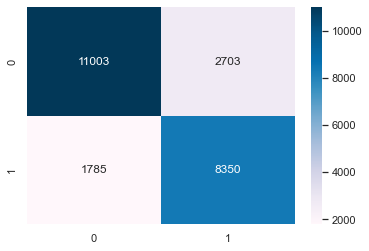

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
min_max_scaler = MinMaxScaler()

X_train[num_standard + num_min_max] = min_max_scaler.fit_transform(X_train[num_standard + num_min_max])
X_train[cat_ordinal] = oe.fit_transform(X_train[cat_ordinal])
X_train = onehot.fit_transform(X_train)

X_test[num_standard + num_min_max] = min_max_scaler.transform(X_test[num_standard + num_min_max])
X_test[cat_ordinal] = oe.transform(X_test[cat_ordinal])
X_test = onehot.transform(X_test)

multNB_clf = MultinomialNB()
multNB_dict = bayes_eval(multNB_clf, X_train, X_test, y_train, y_test)

Accuracy Score:  0.8784866406610461
TP:  12377
FP:  1568
TN:  8567
FN:  1329
Sensitivity:  0.9030351670801109
Specificity:  0.8452886038480513
Precision Score:  0.8657033144704931
Recall Score:  0.8452886038480513
ROC AUC Score:  0.874161885464081


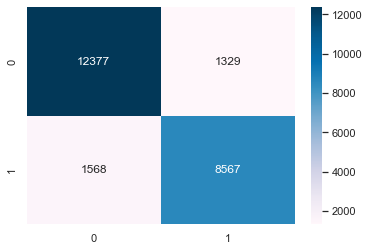

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[num_standard] = std_scaler.fit_transform(X_train[num_standard])
X_train[num_min_max] = min_max_scaler.fit_transform(X_train[num_min_max])
X_train[cat_ordinal] = oe.fit_transform(X_train[cat_ordinal])
X_train = onehot.fit_transform(X_train)

X_test[num_standard] = std_scaler.transform(X_test[num_standard])
X_test[num_min_max] = min_max_scaler.transform(X_test[num_min_max])
X_test[cat_ordinal] = oe.transform(X_test[cat_ordinal])
X_test = onehot.transform(X_test)

gaussNB_clf = GaussianNB()
gaussNB_dict = bayes_eval(gaussNB_clf, X_train, X_test, y_train, y_test)

Accuracy Score:  0.804412566586972
TP:  10203
FP:  1160
TN:  8975
FN:  3503
Sensitivity:  0.7444185028454692
Specificity:  0.8855451406018747
Precision Score:  0.7192659079980767
Recall Score:  0.8855451406018747
ROC AUC Score:  0.8149818217236718


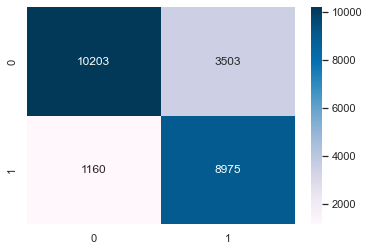

In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
min_max_scaler = MinMaxScaler()

X_train[num_standard + num_min_max] = min_max_scaler.fit_transform(X_train[num_standard + num_min_max])
X_train[cat_ordinal] = oe.fit_transform(X_train[cat_ordinal])
X_train = onehot.fit_transform(X_train)

X_test[num_standard + num_min_max] = min_max_scaler.transform(X_test[num_standard + num_min_max])
X_test[cat_ordinal] = oe.transform(X_test[cat_ordinal])
X_test = onehot.transform(X_test)

compNB_clf = ComplementNB()
compNB_dict = bayes_eval(compNB_clf, X_train, X_test, y_train, y_test)

Accuracy Score:  0.8066775722494862
TP:  10924
FP:  1827
TN:  8308
FN:  2782
Sensitivity:  0.7970232015175835
Specificity:  0.8197335964479526
Precision Score:  0.7491433724075743
Recall Score:  0.8197335964479526
ROC AUC Score:  0.8083783989827681


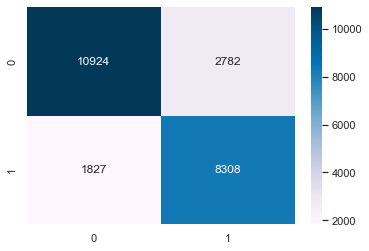

In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[num_standard] = std_scaler.fit_transform(X_train[num_standard])
X_train[num_min_max] = min_max_scaler.fit_transform(X_train[num_min_max])
X_train[cat_ordinal] = oe.fit_transform(X_train[cat_ordinal])
X_train = onehot.fit_transform(X_train)

X_test[num_standard] = std_scaler.transform(X_test[num_standard])
X_test[num_min_max] = min_max_scaler.transform(X_test[num_min_max])
X_test[cat_ordinal] = oe.transform(X_test[cat_ordinal])
X_test = onehot.transform(X_test)

bernNB_clf = BernoulliNB()
bernNB_dict = bayes_eval(bernNB_clf, X_train, X_test, y_train, y_test)

Accuracy Score:  0.8745857975756051
TP:  12697
FP:  1981
TN:  8154
FN:  1009
Sensitivity:  0.926382606157887
Specificity:  0.8045387271830291
Precision Score:  0.8898832260176798
Recall Score:  0.8045387271830291
ROC AUC Score:  0.8654606666704581


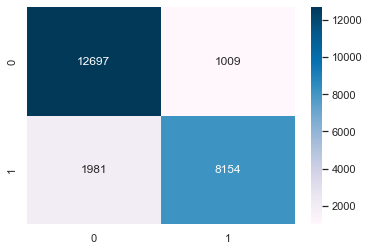

In [19]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
min_max_scaler = MinMaxScaler()

X_train[num_standard + num_min_max] = min_max_scaler.fit_transform(X_train[num_standard + num_min_max])
X_train[cat_ordinal] = oe.fit_transform(X_train[cat_ordinal])
X_train = onehot.fit_transform(X_train)

X_test[num_standard + num_min_max] = min_max_scaler.transform(X_test[num_standard + num_min_max])
X_test[cat_ordinal] = oe.transform(X_test[cat_ordinal])
X_test = onehot.transform(X_test)

categNB_clf = CategoricalNB()
categNB_dict = bayes_eval(categNB_clf, X_train, X_test, y_train, y_test)

In [20]:
df_bayes_nets = pd.DataFrame({'Model':[],
                              'Accuracy':[],
                              'TP':[],
                              'FP':[],
                              'TN':[],
                              'FN':[],
                              'Sensitivity':[],
                              'Specificity':[],
                              'Precision':[],
                              'Recall':[],
                              'Area Under RoC Curve':[],
                             })

In [21]:
for d in [multNB_dict, gaussNB_dict, compNB_dict, bernNB_dict, categNB_dict]:
    df_bayes_nets.loc[len(df_bayes_nets.index)] = [
        d['Model'], 
        d['Accuracy'], 
        d['TP'], 
        d['FP'], 
        d['TN'], 
        d['FN'],
        d['Sensitivity'],
        d['Specificity'],
        d['Precision'],
        d['Recall'],
        d['ROC AUC']
    ]

In [22]:
print(tabulate(df_bayes_nets, headers='keys', tablefmt='psgl'))

    Model            Accuracy     TP    FP    TN    FN    Sensitivity    Specificity    Precision    Recall    Area Under RoC Curve
--  -------------  ----------  -----  ----  ----  ----  -------------  -------------  -----------  --------  ----------------------
 0  MultinomialNB    0.811753  11003  1785  8350  2703       0.802787       0.823878     0.755451  0.823878                0.813332
 1  GaussianNB       0.878487  12377  1568  8567  1329       0.903035       0.845289     0.865703  0.845289                0.874162
 2  ComplementNB     0.804413  10203  1160  8975  3503       0.744419       0.885545     0.719266  0.885545                0.814982
 3  BernoulliNB      0.806678  10924  1827  8308  2782       0.797023       0.819734     0.749143  0.819734                0.808378
 4  CategoricalNB    0.874586  12697  1981  8154  1009       0.926383       0.804539     0.889883  0.804539                0.865461


Observations from the above table:
- GaussianNB and CategoricalNB have the highest accuracies
- CategoricalNB has the highest precision score
- ComplementNB has the highest recall score
- ROC AUC score is highest fir GaussianNB and CatergoricalNB

---

## Lab 7

(Note: there is no Lab 6, the next one is Lab 7)

Objectives of the lab:
- Use K-Means Clusterings on the dataset to find clusters
- Evaluate and visualize the clusters
- Find the optimal number of clusters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate
%matplotlib inline

import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score 
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("data/Airline_Passenger_Satisfaction_Cleaned.csv")

df['satisfaction'] = df['satisfaction'].replace('satisfied', 1)
df['satisfaction'] = df['satisfaction'].replace('neutral or dissatisfied', 0)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
cat_one_hot = ['Gender', 'Customer Type', 'Type of Travel']
cat_ordinal = ['Class']
num_standard = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
num_min_max = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
               'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
               'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [4]:
X = df.iloc[:, :-1]
y_true = df.iloc[:, -1]

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X[num_standard] = std_scaler.fit_transform(X[num_standard])
X[num_min_max] = min_max_scaler.fit_transform(X[num_min_max])
X[cat_ordinal] = oe.fit_transform(X[cat_ordinal])
X = onehot.fit_transform(X)

pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [5]:
from sklearn.cluster import KMeans

In [6]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
y_pred = kmeans.fit_predict(X)

In [7]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

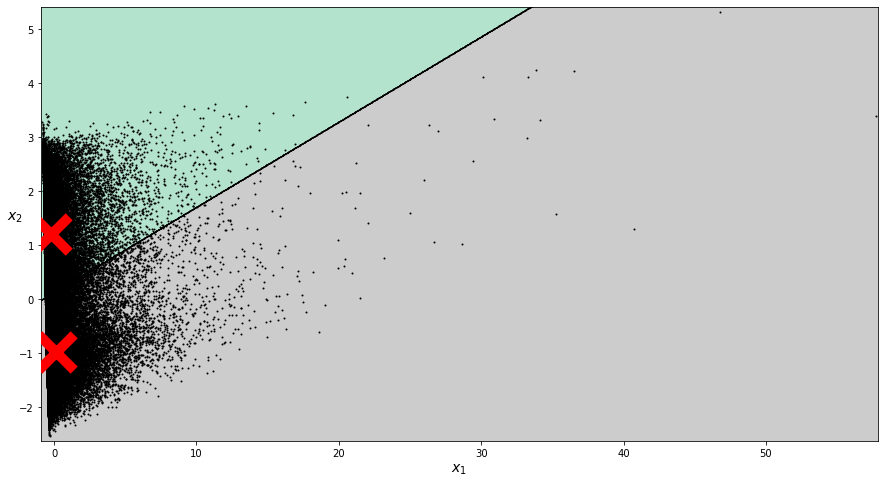

In [8]:
plt.figure(figsize=(15, 8))
plot_decision_boundaries(kmeans, X)
plt.show()

### Finding Optimal Number of Clusters

In [11]:
from sklearn.metrics import silhouette_score

X = df.iloc[:, :-1]
y_true = df.iloc[:, -1]

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
 
X[num_standard] = std_scaler.fit_transform(X[num_standard])
X[num_min_max] = min_max_scaler.fit_transform(X[num_min_max])
X[cat_ordinal] = oe.fit_transform(X[cat_ordinal])
X = onehot.fit_transform(X)

pca = PCA(n_components=2)
X = pca.fit_transform(X)

for k in [2,3,4,5,6,7]:
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_pred = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_pred)
    print("For n_clusters ={}, The average silhouette_score is :{}".format(k, silhouette_avg))

For n_clusters =2, The average silhouette_score is :0.4749204800692359
For n_clusters =3, The average silhouette_score is :0.5326798571313014
For n_clusters =4, The average silhouette_score is :0.5462598107440042
For n_clusters =5, The average silhouette_score is :0.4832292599341209
For n_clusters =6, The average silhouette_score is :0.49241117992112027
For n_clusters =7, The average silhouette_score is :0.5054286352501384


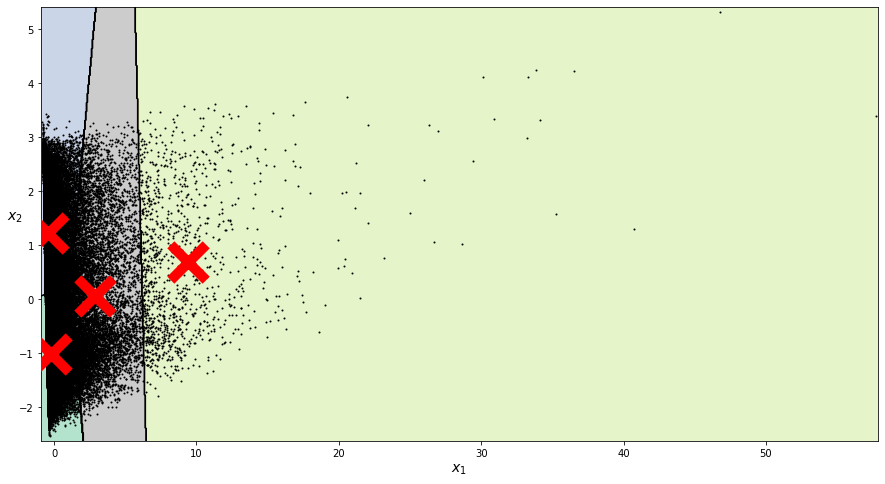

In [12]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
y_pred = kmeans.fit_predict(X)

plt.figure(figsize=(15, 8))
plot_decision_boundaries(kmeans, X)
plt.show()

---

## Lab 8

The objectives of this lab:
- Use Decision Trees for classification
- Perform Cross Validation and Grid Search

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate
%matplotlib inline

import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score 

In [2]:
df = pd.read_csv("data/Airline_Passenger_Satisfaction_Cleaned.csv")

df['satisfaction'] = df['satisfaction'].replace('satisfied', 1)
df['satisfaction'] = df['satisfaction'].replace('neutral or dissatisfied', 0)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
cat_one_hot = ['Gender', 'Customer Type', 'Type of Travel']
cat_ordinal = ['Class']
num_standard = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
num_min_max = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
               'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
               'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[num_standard] = std_scaler.fit_transform(X_train[num_standard])
X_train[num_min_max] = min_max_scaler.fit_transform(X_train[num_min_max])
X_train[cat_ordinal] = oe.fit_transform(X_train[cat_ordinal])
X_train = onehot.fit_transform(X_train)

X_test[num_standard] = std_scaler.transform(X_test[num_standard])
X_test[num_min_max] = min_max_scaler.transform(X_test[num_min_max])
X_test[cat_ordinal] = oe.transform(X_test[cat_ordinal])
X_test = onehot.transform(X_test)

### On Training Set

In [6]:
tree_clf = DecisionTreeClassifier(random_state=0)

tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)

acc = accuracy_score(y_train, y_pred)
presc = precision_score(y_train, y_pred)
rec = recall_score(y_train, y_pred) 
f1 = f1_score(y_train, y_pred)
roc = roc_auc_score(y_train, y_pred)
print("Training Set Scores")
print("Accuracy Score: ", acc)
print("Precision Score: ", presc)
print("Recall Score: ", rec)
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc)

Training Set Scores
Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
ROC AUC Score:  1.0


In [7]:
tree_clf.get_depth()

39

### 10-fold cross validation on training set

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
tree_clf = DecisionTreeClassifier(random_state=0)

cv_acc = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='accuracy').mean()
cv_prec = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='precision').mean()
cv_rec = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='recall').mean()
cv_f1 = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='f1').mean()
cv_roc = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross Validation Scores on Training Set')
print("Scoring - Accuracy: ", cv_acc)
print("Scoring - Precision: ", cv_prec)
print("Scoring - Recall: ", cv_rec)
print("Scoring - F1: ", cv_f1)
print("Scoring - Roc Auc: ", cv_roc)

Cross Validation Scores on Training Set
Scoring - Accuracy:  0.9455973276194518
Scoring - Precision:  0.9336899050430997
Scoring - Recall:  0.9393947184549619
Scoring - F1:  0.936526344924955
Scoring - Roc Auc:  0.9448090338981274


In [8]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = [
    {'criterion': ["gini"], 'max_depth': list(range(1,41)), 'max_features':[None, "sqrt", "log2"], 'min_samples_leaf': list(range(1, 11))},
  ]

tree_clf = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True, error_score='raise')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, scoring='accuracy')

In [16]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': None,
 'min_samples_leaf': 4}

### Tree 1

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[num_standard] = std_scaler.fit_transform(X_train[num_standard])
X_train[num_min_max] = min_max_scaler.fit_transform(X_train[num_min_max])
X_train[cat_ordinal] = oe.fit_transform(X_train[cat_ordinal])
X_train = onehot.fit_transform(X_train)

X_test[num_standard] = std_scaler.transform(X_test[num_standard])
X_test[num_min_max] = min_max_scaler.transform(X_test[num_min_max])
X_test[cat_ordinal] = oe.transform(X_test[cat_ordinal])
X_test = onehot.transform(X_test)

tree_1 = DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=4, max_features=None)

tree_1.fit(X_train,y_train)
y_pred = tree_1.predict(X_test)

acc = accuracy_score(y_test, y_pred)
presc = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
print("Accuracy Score: ", acc)
print("Precision Score: ", presc)
print("Recall Score: ", rec)
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc)

tree_1_dict = {'Tree': "Tree 1", 'Accuracy': acc, 'Precision': presc, 'Recall': rec, "F1 Score": f1, 'ROC AUC': roc}

Accuracy Score:  0.9528371531156673
Precision Score:  0.9586995442708334
Recall Score:  0.9291714319517294
F1 Score:  0.9437045641159153
ROC AUC Score:  0.9497660342705062


### ROC Curve for Tree 1

In [10]:
from sklearn.metrics import roc_curve

In [11]:
tree_1_probs = tree_1.predict_proba(X_test)
tree_1_probs_positive = tree_1_probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, tree_1_probs_positive)

In [12]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)   

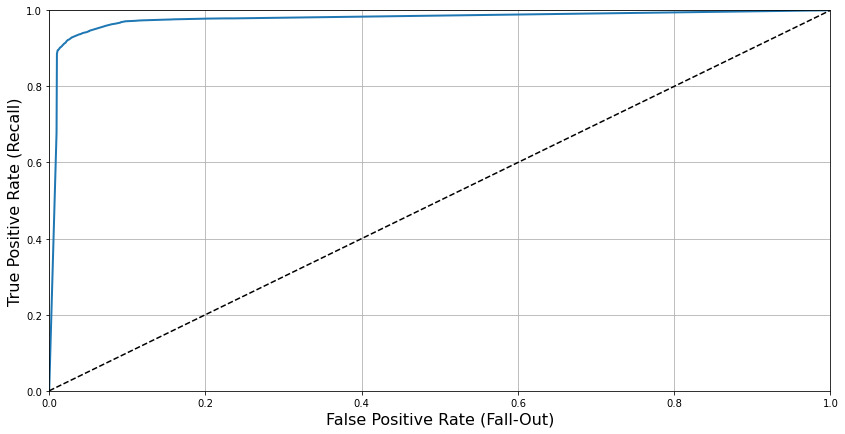

In [13]:
plt.figure(figsize=(14, 7))
plot_roc_curve(fpr, tpr)
plt.show()

### Tree 2

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[num_standard] = std_scaler.fit_transform(X_train[num_standard])
X_train[num_min_max] = min_max_scaler.fit_transform(X_train[num_min_max])
X_train[cat_ordinal] = oe.fit_transform(X_train[cat_ordinal])
X_train = onehot.fit_transform(X_train)

X_test[num_standard] = std_scaler.transform(X_test[num_standard])
X_test[num_min_max] = min_max_scaler.transform(X_test[num_min_max])
X_test[cat_ordinal] = oe.transform(X_test[cat_ordinal])
X_test = onehot.transform(X_test)

tree_2 = DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=4, max_features=None)
tree_2.fit(X_train,y_train)
y_pred = tree_2.predict(X_test)

acc = accuracy_score(y_test, y_pred)
presc = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
print("Accuracy Score: ", acc)
print("Precision Score: ", presc)
print("Recall Score: ", rec)
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc)

tree_2_dict = {'Tree': "Tree 2", 'Accuracy': acc, 'Precision': presc, 'Recall': rec, "F1 Score": f1, 'ROC AUC': roc}

Accuracy Score:  0.9532733800879165
Precision Score:  0.9587431916104382
Recall Score:  0.9301967898410696
F1 Score:  0.9442542885165837
ROC AUC Score:  0.9502787132151762


### Tree 3

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[num_standard] = std_scaler.fit_transform(X_train[num_standard])
X_train[num_min_max] = min_max_scaler.fit_transform(X_train[num_min_max])
X_train[cat_ordinal] = oe.fit_transform(X_train[cat_ordinal])
X_train = onehot.fit_transform(X_train)

X_test[num_standard] = std_scaler.transform(X_test[num_standard])
X_test[num_min_max] = min_max_scaler.transform(X_test[num_min_max])
X_test[cat_ordinal] = oe.transform(X_test[cat_ordinal])
X_test = onehot.transform(X_test)

tree_3 = DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=4, max_features=None)
tree_3.fit(X_train,y_train)
y_pred = tree_3.predict(X_test)

acc = accuracy_score(y_test, y_pred)
presc = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
print("Accuracy Score: ", acc)
print("Precision Score: ", presc)
print("Recall Score: ", rec)
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc)

tree_3_dict = {'Tree': "Tree 3", 'Accuracy': acc, 'Precision': presc, 'Recall': rec, "F1 Score": f1, 'ROC AUC': roc}

Accuracy Score:  0.9423262447045007
Precision Score:  0.9416540595057993
Recall Score:  0.9213954406394947
F1 Score:  0.9314146049481246
ROC AUC Score:  0.9395969032786035


In [16]:
df_dt = pd.DataFrame({'Tree':[], 'Accuracy':[], 'Precision':[], 'Recall':[], "F1 Score": [], 'Area Under RoC Curve':[],})

In [17]:
for d in [tree_1_dict, tree_2_dict, tree_3_dict]:
    df_dt.loc[len(df_dt.index)] = [
        d['Tree'], 
        d['Accuracy'], 
        d['Precision'],
        d['Recall'],
        d['F1 Score'],
        d['ROC AUC']
    ]

In [18]:
print(tabulate(df_dt, headers='keys', tablefmt='psgl'))

    Tree      Accuracy    Precision    Recall    F1 Score    Area Under RoC Curve
--  ------  ----------  -----------  --------  ----------  ----------------------
 0  Tree 1    0.952837     0.9587    0.929171    0.943705                0.949766
 1  Tree 2    0.953273     0.958743  0.930197    0.944254                0.950279
 2  Tree 3    0.942326     0.941654  0.921395    0.931415                0.939597


---

## Lab 9

The objectives of this lab:
- Perform Linear Regression on the dataset
- Perform Logistic Regression on the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate
%matplotlib inline

import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA 

In [2]:
df = pd.read_csv("data/Airline_Passenger_Satisfaction_Cleaned.csv")

df['satisfaction'] = df['satisfaction'].replace('satisfied', 1)
df['satisfaction'] = df['satisfaction'].replace('neutral or dissatisfied', 0)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
df_top2 = pd.read_csv("data/Airline_Passenger_Satisfaction_Top2.csv")
df_top4 = pd.read_csv("data/Airline_Passenger_Satisfaction_Top4.csv")
df_top6 = pd.read_csv("data/Airline_Passenger_Satisfaction_Top6.csv")
df_top2.drop('Unnamed: 0', axis=1, inplace=True)
df_top4.drop('Unnamed: 0', axis=1, inplace=True)
df_top6.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
cat_one_hot = ['Gender', 'Customer Type', 'Type of Travel']
cat_ordinal = ['Class']
num_standard = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
num_min_max = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
               'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
               'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [4]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

### Linear Regression

In [20]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[num_standard] = std_scaler.fit_transform(X_train[num_standard])
X_train[num_min_max] = min_max_scaler.fit_transform(X_train[num_min_max])
X_train[cat_ordinal] = oe.fit_transform(X_train[cat_ordinal])
X_train = onehot.fit_transform(X_train)

X_test[num_standard] = std_scaler.transform(X_test[num_standard])
X_test[num_min_max] = min_max_scaler.transform(X_test[num_min_max])
X_test[cat_ordinal] = oe.transform(X_test[cat_ordinal])
X_test = onehot.transform(X_test)

lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)
y_pred = lin_regr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.09127524512785945


In [7]:
y_pred = lin_regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.09079684861103139


### Logistic Regression

In [26]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[num_standard] = std_scaler.fit_transform(X_train[num_standard])
X_train[num_min_max] = min_max_scaler.fit_transform(X_train[num_min_max])
X_train[cat_ordinal] = oe.fit_transform(X_train[cat_ordinal])
X_train = onehot.fit_transform(X_train)

X_test[num_standard] = std_scaler.transform(X_test[num_standard])
X_test[num_min_max] = min_max_scaler.transform(X_test[num_min_max])
X_test[cat_ordinal] = oe.transform(X_test[cat_ordinal])
X_test = onehot.transform(X_test)

In [27]:
log_reg = LogisticRegression(random_state=0)

log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_train)

acc = accuracy_score(y_train, y_pred)
presc = precision_score(y_train, y_pred)
rec = recall_score(y_train, y_pred) 
f1 = f1_score(y_train, y_pred)
roc = roc_auc_score(y_train, y_pred)
print("Logistic Regression Scores on Training Set")
print("Accuracy Score: ", acc)
print("Precision Score: ", presc)
print("Recall Score: ", rec)
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc)

Logistic Regression Scores on Training Set
Accuracy Score:  0.8979583276532828
Precision Score:  0.881552394546439
Recall Score:  0.8792802965217604
F1 Score:  0.880414879628378
ROC AUC Score:  0.8955844218402593


### ROC Curve

In [10]:
from sklearn.metrics import roc_curve

In [11]:
log_reg_probs = log_reg.predict_proba(X_test)
log_reg_probs_positive = log_reg_probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, log_reg_probs_positive)

In [12]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)   

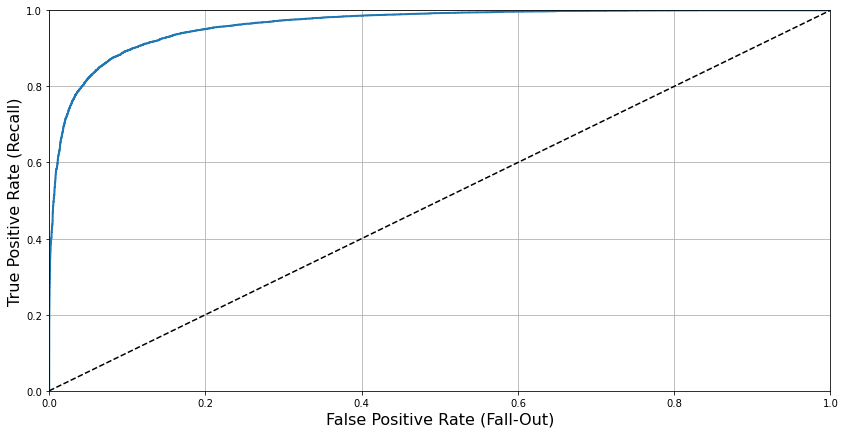

In [13]:
plt.figure(figsize=(14, 7))
plot_roc_curve(fpr, tpr)
plt.show()

---

## Lab 10

The objectives of this lab:
- Run the Perceptron model on the dataset
- Create Multi Layer Perceptron models to perform classification on the dataset and compare their accuracies

In [1]:
import sklearn
assert sklearn.__version__ >= "0.20"
import tensorflow as tf
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
from tabulate import tabulate

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("data/Airline_Passenger_Satisfaction_Cleaned.csv")

df['satisfaction'] = df['satisfaction'].replace('satisfied', 1)
df['satisfaction'] = df['satisfaction'].replace('neutral or dissatisfied', 0)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
cat_one_hot = ['Gender', 'Customer Type', 'Type of Travel']
cat_ordinal = ['Class']
num_standard = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
num_min_max = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
               'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
               'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

onehot = ColumnTransformer([('onehot', OneHotEncoder(), cat_one_hot)], remainder='passthrough')
oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[num_standard] = std_scaler.fit_transform(X_train[num_standard])
X_train[num_min_max] = min_max_scaler.fit_transform(X_train[num_min_max])
X_train[cat_ordinal] = oe.fit_transform(X_train[cat_ordinal])
X_train = onehot.fit_transform(X_train)

X_test[num_standard] = std_scaler.transform(X_test[num_standard])
X_test[num_min_max] = min_max_scaler.transform(X_test[num_min_max])
X_test[cat_ordinal] = oe.transform(X_test[cat_ordinal])
X_test = onehot.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron

In [6]:
per_clf = Perceptron(random_state=0)
per_clf.fit(X_train, y_train)

y_pred = per_clf.predict(X_train)
acc = accuracy_score(y_train, y_pred)
presc = precision_score(y_train, y_pred)
rec = recall_score(y_train, y_pred) 
f1 = f1_score(y_train, y_pred)
roc = roc_auc_score(y_train, y_pred)
print("Accuracy Score: ", acc)
print("Precision Score: ", presc)
print("Recall Score: ", rec)
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc)

Accuracy Score:  0.8592640751654206
Precision Score:  0.8012571680635201
Recall Score:  0.8917499202238641
F1 Score:  0.8440850846315594
ROC AUC Score:  0.8633929009438008


In [7]:
per_clf = Perceptron(random_state=0)

cv_acc = cross_val_score(per_clf, X_train, y_train, cv=10, scoring='accuracy').mean()
cv_prec = cross_val_score(per_clf, X_train, y_train, cv=10, scoring='precision').mean()
cv_rec = cross_val_score(per_clf, X_train, y_train, cv=10, scoring='recall').mean()
cv_f1 = cross_val_score(per_clf, X_train, y_train, cv=10, scoring='f1').mean()
cv_roc = cross_val_score(per_clf, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross Validation Scores on Training Set')
print("Scoring - Accuracy: ", cv_acc)
print("Scoring - Precision: ", cv_prec)
print("Scoring - Recall: ", cv_rec)
print("Scoring - F1: ", cv_f1)
print("Scoring - Roc Auc: ", cv_roc)

Cross Validation Scores on Training Set
Scoring - Accuracy:  0.8622110479020952
Scoring - Precision:  0.8143941965987634
Scoring - Recall:  0.8912831316929463
Scoring - F1:  0.847586161887733
Scoring - Roc Auc:  0.9472709902713008


### MLP Classifiers

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD

### MLP Classifier 1

In [16]:
ann_clf1 = keras.models.Sequential()

# Input layer
ann_clf1.add(keras.layers.Dense(units=4, activation="relu"))

# Hidden layers
ann_clf1.add(keras.layers.Dense(units=6, activation="relu"))

# Output layer
ann_clf1.add(keras.layers.Dense(units=1, activation="sigmoid"))

# Compile
sgd = SGD(learning_rate = 0.01, momentum = 0)
ann_clf1.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["accuracy"])

# Fit
ann_clf1.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=28)

Epoch 1/30
3066/3066 [==============================] - 6s 2ms/step - loss: 0.5781 - accuracy: 0.6830 - val_loss: 0.4193 - val_accuracy: 0.8487
Epoch 2/30
3066/3066 [==============================] - 4s 1ms/step - loss: 0.3078 - accuracy: 0.8900 - val_loss: 0.2647 - val_accuracy: 0.9000
Epoch 3/30
3066/3066 [==============================] - 4s 1ms/step - loss: 0.2462 - accuracy: 0.9056 - val_loss: 0.2455 - val_accuracy: 0.9023
Epoch 4/30
3066/3066 [==============================] - 3s 1ms/step - loss: 0.2301 - accuracy: 0.9085 - val_loss: 0.2348 - val_accuracy: 0.9055
Epoch 5/30
3066/3066 [==============================] - 3s 1ms/step - loss: 0.2216 - accuracy: 0.9116 - val_loss: 0.2280 - val_accuracy: 0.9085
Epoch 6/30
3066/3066 [==============================] - 3s 1ms/step - loss: 0.2157 - accuracy: 0.9125 - val_loss: 0.2177 - val_accuracy: 0.9119
Epoch 7/30
3066/3066 [==============================] - 3s 1ms/step - loss: 0.2111 - accuracy: 0.9142 - val_loss: 0.2139 - val_accuracy:

### MLP Classifier 2

In [18]:
ann_clf2 = keras.models.Sequential()

# Input layer
ann_clf2.add(keras.layers.Dense(units=4, activation="relu"))

# Hidden layers
ann_clf2.add(keras.layers.Dense(units=6, activation="relu"))
ann_clf2.add(keras.layers.Dense(units=6, activation="relu"))
ann_clf2.add(keras.layers.Dense(units=6, activation="relu"))

# Output layer
ann_clf2.add(keras.layers.Dense(units=1, activation="sigmoid"))

# Compile
sgd = SGD(learning_rate = 0.1, momentum = 0.8)
ann_clf2.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["accuracy"])

# Fit
ann_clf2.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=28)

Epoch 1/30
3066/3066 [==============================] - 6s 2ms/step - loss: 0.2327 - accuracy: 0.9033 - val_loss: 0.1901 - val_accuracy: 0.9199
Epoch 2/30
3066/3066 [==============================] - 4s 1ms/step - loss: 0.1930 - accuracy: 0.9219 - val_loss: 0.1945 - val_accuracy: 0.9234
Epoch 3/30
3066/3066 [==============================] - 4s 1ms/step - loss: 0.1710 - accuracy: 0.9287 - val_loss: 0.1974 - val_accuracy: 0.9102
Epoch 4/30
3066/3066 [==============================] - 4s 1ms/step - loss: 0.1645 - accuracy: 0.9307 - val_loss: 0.1774 - val_accuracy: 0.9289
Epoch 5/30
3066/3066 [==============================] - 4s 1ms/step - loss: 0.1615 - accuracy: 0.9309 - val_loss: 0.1560 - val_accuracy: 0.9360
Epoch 6/30
3066/3066 [==============================] - 4s 1ms/step - loss: 0.1582 - accuracy: 0.9328 - val_loss: 0.1923 - val_accuracy: 0.9191
Epoch 7/30
3066/3066 [==============================] - 4s 1ms/step - loss: 0.1573 - accuracy: 0.9336 - val_loss: 0.1547 - val_accuracy:

### MLP Classifier 3

In [20]:
ann_clf3 = keras.models.Sequential()

# Input layer
ann_clf3.add(keras.layers.Dense(units=4, activation="relu"))

# Hidden layers
ann_clf3.add(keras.layers.Dense(units=6, activation="relu"))
ann_clf3.add(keras.layers.Dense(units=6, activation="relu"))
ann_clf3.add(keras.layers.Dense(units=6, activation="relu"))
ann_clf3.add(keras.layers.Dense(units=6, activation="relu"))
ann_clf3.add(keras.layers.Dense(units=6, activation="relu"))
ann_clf3.add(keras.layers.Dense(units=6, activation="relu"))

# Output layer
ann_clf3.add(keras.layers.Dense(units=1, activation="sigmoid"))

# Compile
sgd = SGD(learning_rate = 0.05, momentum = 0.7)
ann_clf3.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["accuracy"])

# Fit
ann_clf3.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=28)

Epoch 1/30
3066/3066 [==============================] - 5s 2ms/step - loss: 0.2822 - accuracy: 0.8777 - val_loss: 0.2123 - val_accuracy: 0.9129
Epoch 2/30
3066/3066 [==============================] - 5s 2ms/step - loss: 0.1963 - accuracy: 0.9203 - val_loss: 0.1989 - val_accuracy: 0.9219
Epoch 3/30
3066/3066 [==============================] - 5s 1ms/step - loss: 0.1806 - accuracy: 0.9261 - val_loss: 0.1749 - val_accuracy: 0.9292
Epoch 4/30
3066/3066 [==============================] - 5s 2ms/step - loss: 0.1738 - accuracy: 0.9273 - val_loss: 0.1726 - val_accuracy: 0.9307
Epoch 5/30
3066/3066 [==============================] - 5s 1ms/step - loss: 0.1704 - accuracy: 0.9290 - val_loss: 0.1825 - val_accuracy: 0.9178
Epoch 6/30
3066/3066 [==============================] - 5s 2ms/step - loss: 0.1683 - accuracy: 0.9287 - val_loss: 0.1714 - val_accuracy: 0.9262
Epoch 7/30
3066/3066 [==============================] - 5s 2ms/step - loss: 0.1660 - accuracy: 0.9288 - val_loss: 0.1738 - val_accuracy:

### Table of MLP Classifiers

|    MLP Classifier     |      Learning Rate      |  Momentum |  Number of Nodes per Layer        | Accuracy after 30 epochs |
|-----------------------|-------------------------|-----------|-----------------------------------|--------------------------|
|          1            |           0.01          |     0     |    4 x 6 x 1                      |         0.9176           |
|          2            |           0.1           |    0.8    |    4 x 6 x 6 x 6 x 1              |         0.9276           |
|          3            |           0.05          |    0.7    |    4 x 6 x 6 x 6 x 6 x 6 x 6 x 1  |         0.9360           |

---